# Veri Bilimi Değerlendirme Projesi
## Tablet Sınıflandırma Problemi

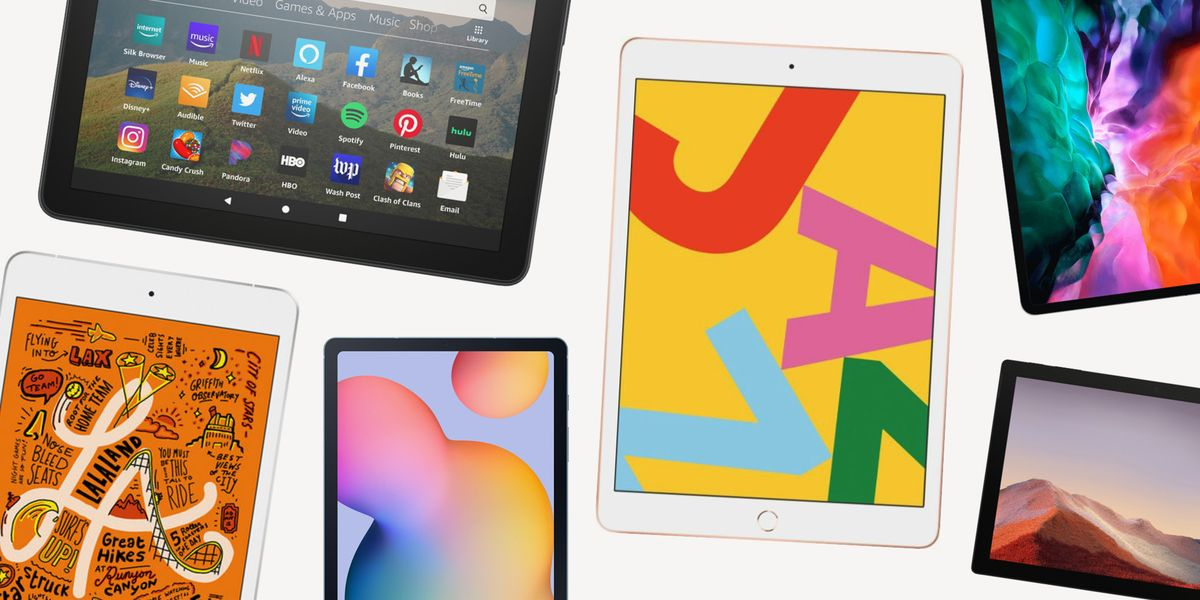

## İzlenecek Adımlar
[1. Keşifçi Veri Analizi](#1)<br/>
[2. Ön İşleme](#2)<br/>
[3. Öznitelik İşlemleri](#3)<br/>
[4. Tahmine Dayalı Makine Öğrenmesi](#4)<br/>
[5. Değerlendirme](#5)<br/>


<a id=1> </a>
## Keşifçi Veri Analizi

> **Veri Seti Özet Bilgiler**<br/>
> - Veri seti 2017 gözlem ve 20 öznitelikten oluşmaktadır.<br/>
> - Her bir gözlem farklı bir tablete ait özellikleri bulundurmaktadır.<br/>
> - 12 öznitelik nümerik, 8 öznitelik kategoriktir.<br/>
> - Veri setinin %1.5'lik bölümünde eksik veri bulunmaktadır.<br/>
> - Ön kamera mp ve çözünürlük yükseklik özniteliklerinde aykırı değerler bulunmaktadır

### Kütüphanelerin Yüklenmesi

In [1]:
#Keşifçi Veri Analizi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Veri Ön İşleme
#!pip install missingno
import missingno                   
from sklearn import preprocessing    
import matplotlib.pyplot as plt

#MODEL EĞİTİMİ
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Makine Öğrenmesi Modelleri
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#Uyarı Önleyici
from warnings import filterwarnings
filterwarnings('ignore')

#Seaborn Parametre Güncelleme
sns.set_palette("tab10")
sns.set_style("whitegrid")
params = {'legend.fontsize':20,
          'legend.title_fontsize':20,
          'figure.figsize':(20, 10),
          'axes.labelsize':20,
          'axes.titlesize':20,
          'xtick.labelsize':20,
          'ytick.labelsize':20}
plt.rcParams.update(params)

### Veri Setinin Okunması

In [2]:
columns = ['BataryaGucu', 'Bluetooth','MikroislemciHizi',
           'CiftHat', 'OnKameraMP', '4G', 'DahiliBellek',
           'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP',
           'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru',
           '3G','Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk']

In [3]:
tablet = pd.read_csv("mobil.csv", usecols=columns, delimiter="\t",decimal=",")
df = tablet.copy()

**Veri Setinin İlk 5 Gözlemi**

In [4]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,"2,0",Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,"1,0",Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [5]:
df.shape

(2017, 20)

> - Veri setinde 20 öznitelik ve 2017 gözlem bulunmaktadır.

**Özniteliklerin Türleri**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2017 non-null   int64  
 1   Bluetooth            2017 non-null   object 
 2   MikroislemciHizi     2017 non-null   float64
 3   CiftHat              2017 non-null   object 
 4   OnKameraMP           2012 non-null   object 
 5   4G                   2017 non-null   object 
 6   DahiliBellek         2017 non-null   int64  
 7   Kalinlik             2017 non-null   float64
 8   Agirlik              2017 non-null   int64  
 9   CekirdekSayisi       2017 non-null   int64  
 10  ArkaKameraMP         2017 non-null   int64  
 11  CozunurlukYükseklik  2017 non-null   int64  
 12  CozunurlukGenislik   2017 non-null   int64  
 13  RAM                  2005 non-null   object 
 14  BataryaOmru          2017 non-null   int64  
 15  3G                   2013 non-null   o

> - 8 öznitelik kategorik, 12 öznitelik sayısaldır.

**Verideki Eksik Değerler**

In [7]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      4
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

> - RAM özniteliğinde 12 eksik gözlem vardır.
> - OnKameraMP özniteliğinde 5 eksik gözlem vardır.
> - 3G özniteliğinde 4 eksik gözlem vardır.

> - Ek olarak bütün öznitelikler için unique sorgusu yapılacaktır.
> - Çünkü bazı durumlarda " " , 0 veya - gibi değerlerde veride gözlemlenebilir.

In [8]:
df["BataryaGucu"].unique()

array([1325, 1046,  843, ...,  990, 1372, 1501], dtype=int64)

In [9]:
df["Bluetooth"].unique()

array(['Yok', 'Var', ' '], dtype=object)

In [10]:
df[df["Bluetooth"]==" "].shape[0]

10

> - Bluetooth özniteliğinde " " değerli gözlemler bulunmaktadır. Ön işleme aşamasında bu değerler değiştirilecektir.

In [11]:
df["MikroislemciHizi"].unique()

array([1.9, 2.8, 1.3, 0.5, 1. , 0.8, 0.6, 1.7, 2.1, 2.2, 2. , 1.8, 2.5,
       0.7, 1.5, 3. , 2.3, 2.7, 1.4, 1.1, 2.4, 2.9, 1.6, 1.2, 2.6, 0.9])

In [12]:
df["CiftHat"].unique()

array(['Yok', 'Var'], dtype=object)

In [13]:
df["OnKameraMP"].unique()

array(['2,0', '0.0', '1.0', '1,0', '2.0', '12.0', '9,0', '10.0', '4,0',
       '7.0', '9.0', '13,0', '11.0', '5.0', '3.0', '6,0', '10,0', '6.0',
       '4.0', '0,0', '13.0', '12,0', '3,0', '5,0', '7,0', '8.0', '14.0',
       '11,0', '8,0', '16.0', '18,0', '15.0', nan, '14,0', '19.0', '18.0',
       '17,0', '15,0', '16,0', '17.0'], dtype=object)

In [14]:
df["4G"].unique()

array(['Yok', 'Var'], dtype=object)

In [15]:
df["DahiliBellek"].unique()

array([50, 58, 16, 18, 29, 55, 13, 21,  7,  8,  2, 20, 42, 61, 33, 49, 30,
       23,  6, 24, 19, 52, 60, 51, 59, 15, 56, 54, 12, 11, 31, 22, 10, 53,
       63, 36, 40,  3, 41, 32, 46, 25,  9, 57, 34, 37, 27, 26, 64, 39, 14,
       35, 62, 47, 17,  4, 38, 28, 48,  5, 45, 43, 44], dtype=int64)

In [16]:
df["Kalinlik"].unique()

array([0.1, 0.2, 0.9, 0.5, 0.7, 0.3, 1. , 0.8, 0.6, 0.4])

In [17]:
df["Agirlik"].unique()

array([146, 100, 119, 199, 153, 104, 181,  83, 105, 145, 151, 191,  91,
       193, 129, 101, 114, 177, 142, 133, 123, 149,  88,  97, 198, 162,
       124, 156, 161, 120, 147, 131, 154, 108, 192,  98, 179, 200, 122,
       185, 196, 197, 167, 136,  95, 135, 187,  87, 163, 103, 165, 134,
       113, 141, 125, 117, 102, 169, 178, 144, 184, 160, 127,  99,  84,
       152,  86, 112, 121, 143, 176,  93, 130,  90, 148,  89,  80, 166,
       190,  81, 106, 137, 132, 157, 183, 172, 189,  92,  82, 126, 138,
       174, 170, 164, 140, 109,  94, 139, 111, 173, 155,  85, 159, 182,
       188, 194, 107, 118, 195, 180, 186, 110, 158, 175, 150, 168, 128,
       171, 116,  96, 115], dtype=int64)

In [18]:
df["CekirdekSayisi"].unique()

array([1, 8, 7, 3, 4, 6, 5, 2], dtype=int64)

In [19]:
df["ArkaKameraMP"].unique()

array([10,  0,  4, 14, 18, 12,  3, 20, 13, 19, 17, 15,  9,  7,  5,  1,  6,
        2, 11,  8, 16], dtype=int64)

In [20]:
df["CozunurlukYükseklik"].unique()

array([ 499,  259,  593, ...,  487, 1184,  672], dtype=int64)

In [21]:
df["CozunurlukGenislik"].unique()

array([ 695, 1040,  732, ..., 1252, 1719, 1359], dtype=int64)

In [22]:
df["RAM"].unique()

array(['2328.0', '3863.0', '1734.0', ..., '3557.0', '3653.0', '2273.0'],
      dtype=object)

In [23]:
df["BataryaOmru"].unique()

array([ 2,  9, 14,  6,  3, 15,  4, 16,  8,  7, 11, 13, 10, 18,  5, 20, 19,
       12, 17], dtype=int64)

In [24]:
df["CekirdekSayisi"].unique()

array([1, 8, 7, 3, 4, 6, 5, 2], dtype=int64)

In [25]:
df["3G"].unique()

array(['Var', 'Yok', nan], dtype=object)

In [26]:
df["WiFi"].unique()

array(['Yok', 'Var'], dtype=object)

In [27]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [28]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

**Özniteliklerin Merkezi Eğilim Ölçüleri**

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2017.0,1238.777392,439.821621,501.0,852.0,1225.0,1617.0,1998.0
MikroislemciHizi,2017.0,1.521914,0.815868,0.5,0.7,1.5,2.2,3.0
DahiliBellek,2017.0,32.064948,18.154573,2.0,16.0,32.0,48.0,64.0
Kalinlik,2017.0,0.501785,0.288549,0.1,0.2,0.5,0.8,1.0
Agirlik,2017.0,140.164105,35.392321,80.0,109.0,141.0,170.0,200.0
CekirdekSayisi,2017.0,4.521071,2.287535,1.0,3.0,4.0,7.0,8.0
ArkaKameraMP,2017.0,9.916212,6.073493,0.0,5.0,10.0,15.0,20.0
CozunurlukYükseklik,2017.0,645.909767,443.489410,0.0,283.0,570.0,950.0,1960.0
CozunurlukGenislik,2017.0,1250.790283,431.963608,500.0,875.0,1247.0,1631.0,1998.0
BataryaOmru,2017.0,11.002975,5.464259,2.0,6.0,11.0,16.0,20.0


> Bazı değişkenlerin dağılımı 0 ile 1 arasında dağılım gözlemlenirken bazı değişkenlerin dağılımı 0 ile 2000 aralığında dağılım göstermektedir. Bu durumda ölçeklendirme yapılabilir.
<br/>

**Türlerine Göre Öznitelikler**

> - **Nümerik :** 'BataryaGucu' , 'MikroislemciHizi' , 'OnKameraMP' , 'DahiliBellek' , 'Kalinlik' , 'Agirlik' , 'CekirdekSayisi' 'ArkaKameraMP' , 'CozunurlukYükseklik' , 'CozunurlukGenislik' , 'RAM' , 'BataryaOmru' 

> - **Kategorik :**  'Bluetooth' , 'CiftHat' , '4G' , '3G' , 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'

### Kategorik Özniteliklerin Dağılımları

**Bluetooth Özniteliği**

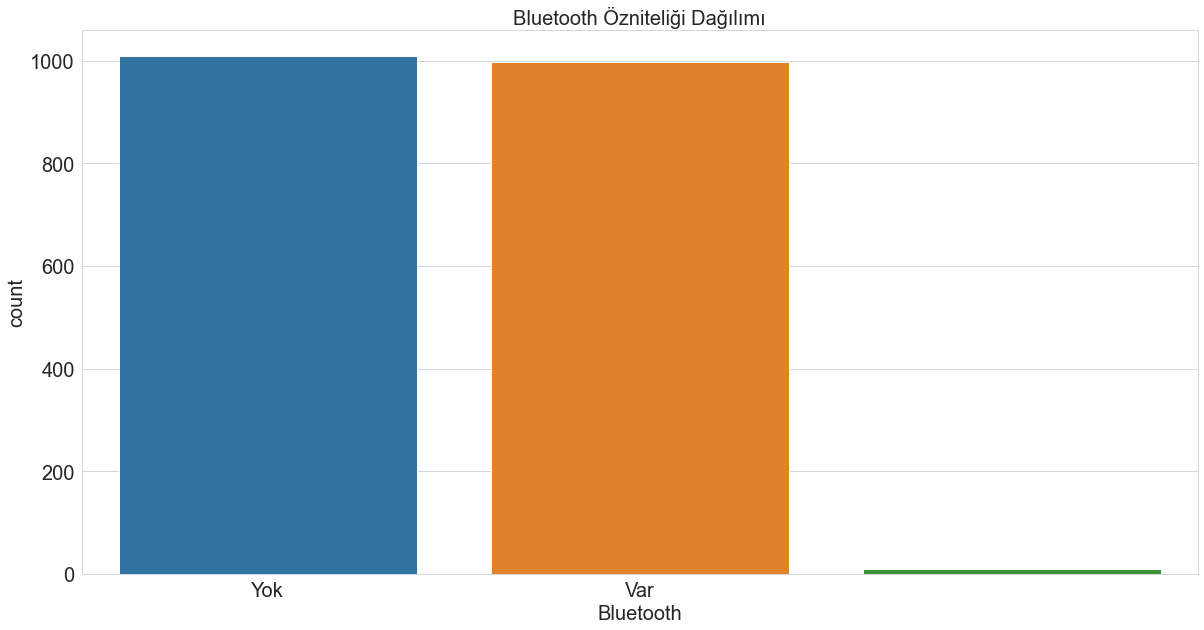

In [30]:
sns.countplot(df["Bluetooth"])
plt.title("Bluetooth Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir.

**Çift Hat Özniteliği**

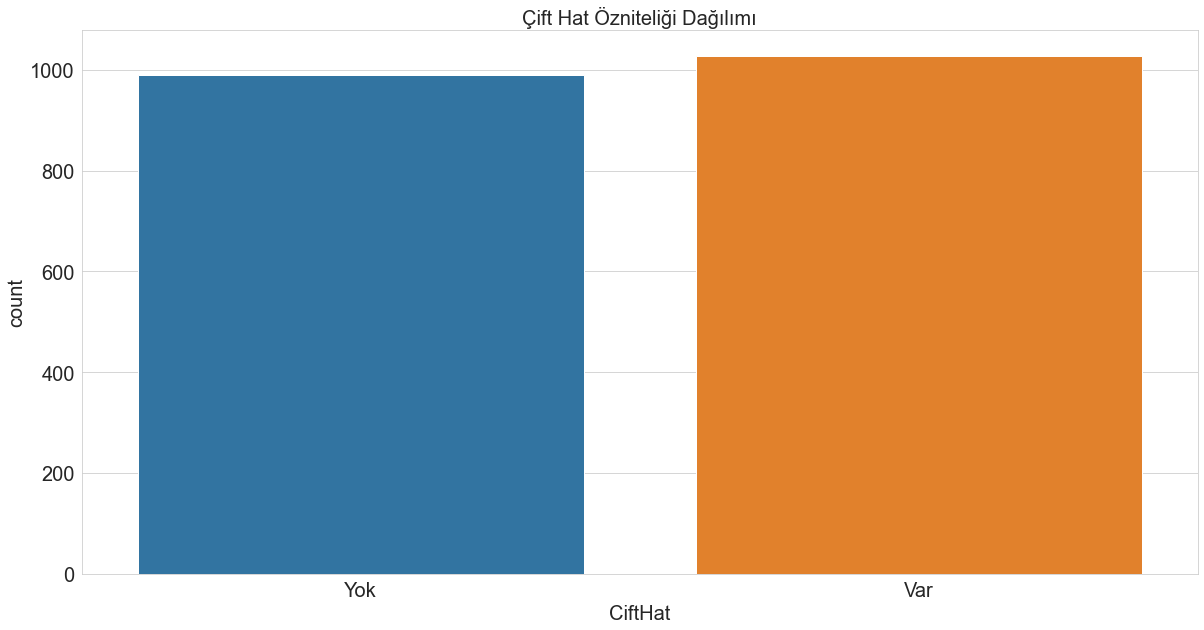

In [31]:
sns.countplot(df["CiftHat"])
plt.title("Çift Hat Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir.

**3G Özniteliği**

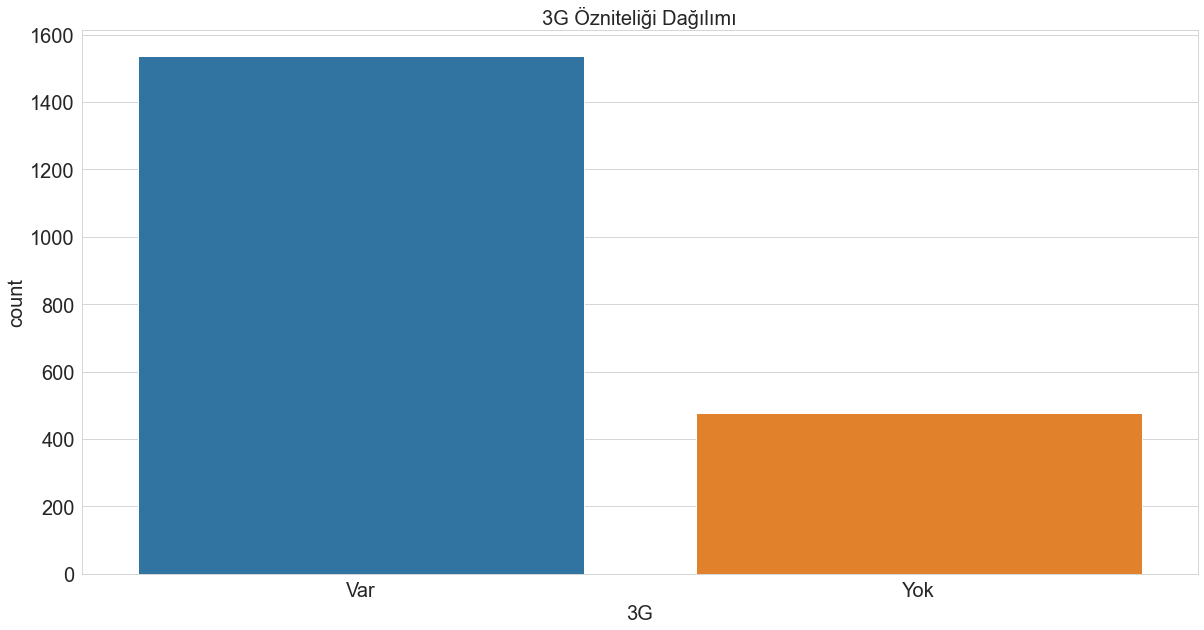

In [32]:
sns.countplot(df["3G"])
plt.title("3G Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenememektedir. Bu da 3G teknolojisinin uzun yıllar kullanılması ile artık default olarak 3G'li tabletler üretildiğini göstermektedir.

**4G Özniteliği**

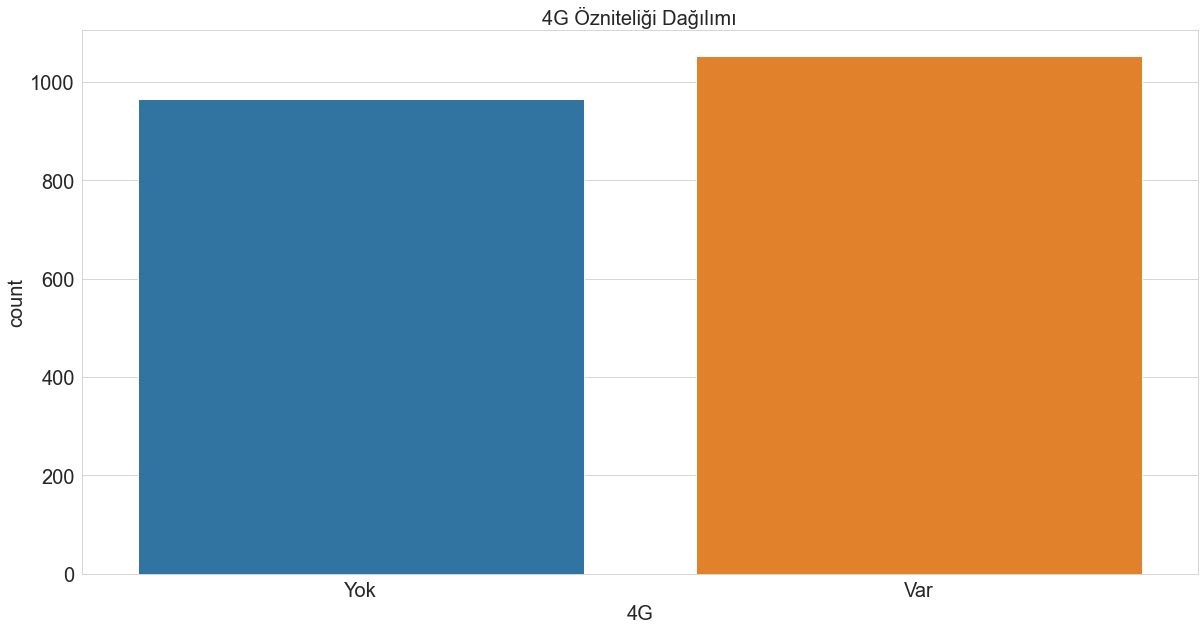

In [33]:
sns.countplot(df["4G"])
plt.title("4G Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir. 4G li tabletler daha çok bulunmaktadır.

**Dokunmatik Özniteliği**

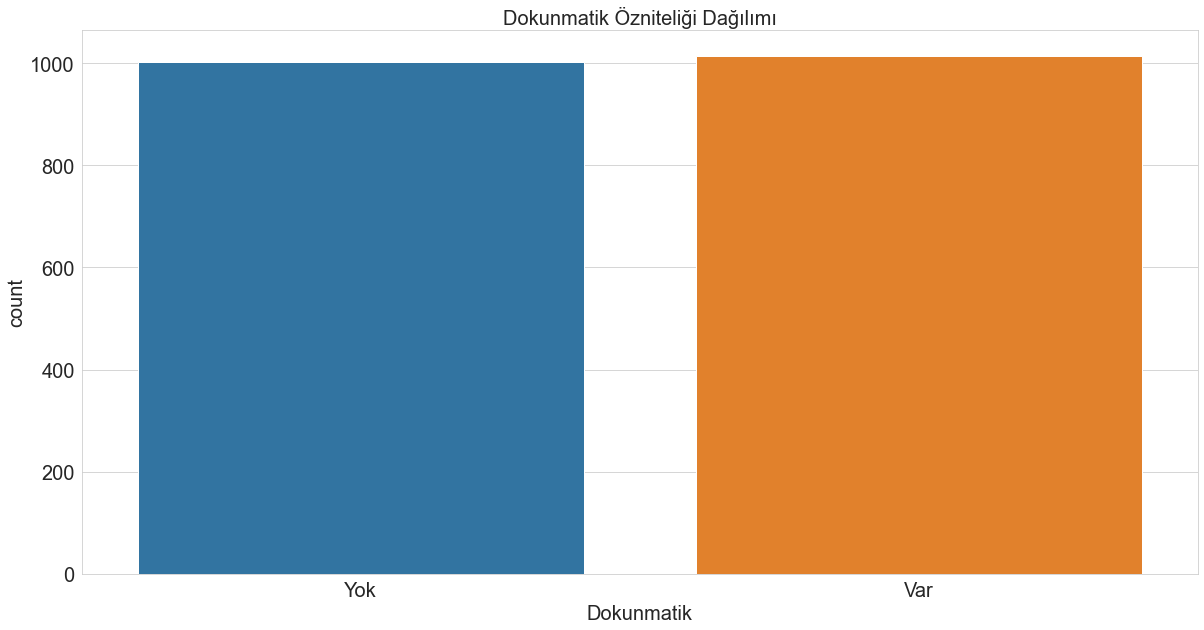

In [34]:
sns.countplot(df["Dokunmatik"])
plt.title("Dokunmatik Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir.

**Wifi Özniteliği**

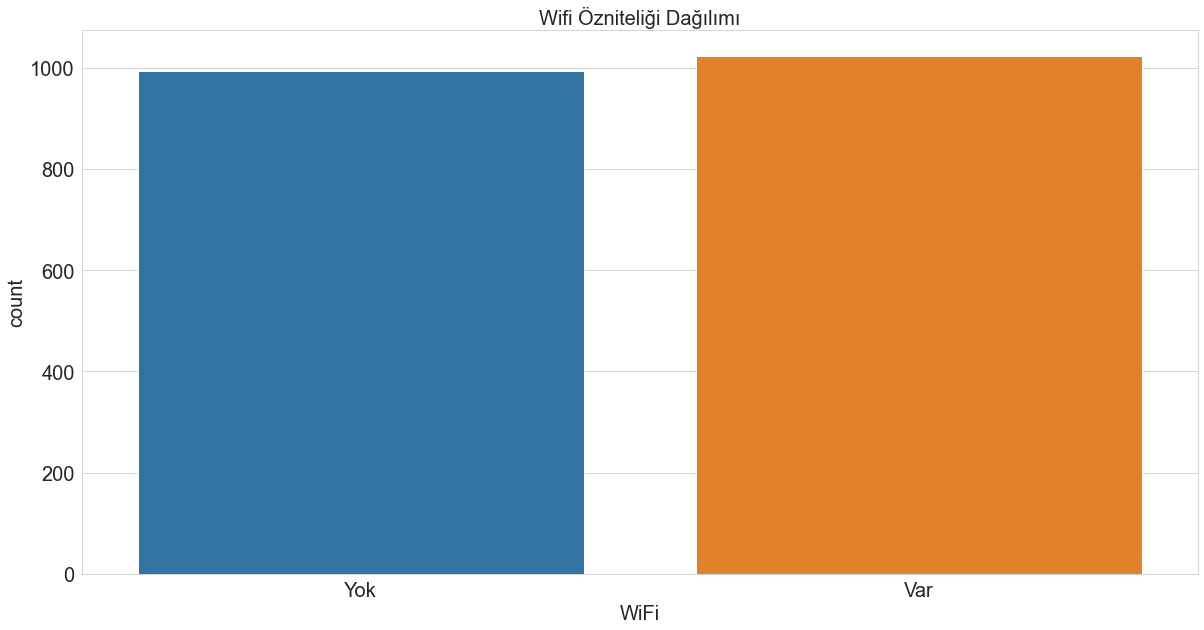

In [35]:
sns.countplot(df["WiFi"])
plt.title("Wifi Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir.

**Renk Özniteliği**

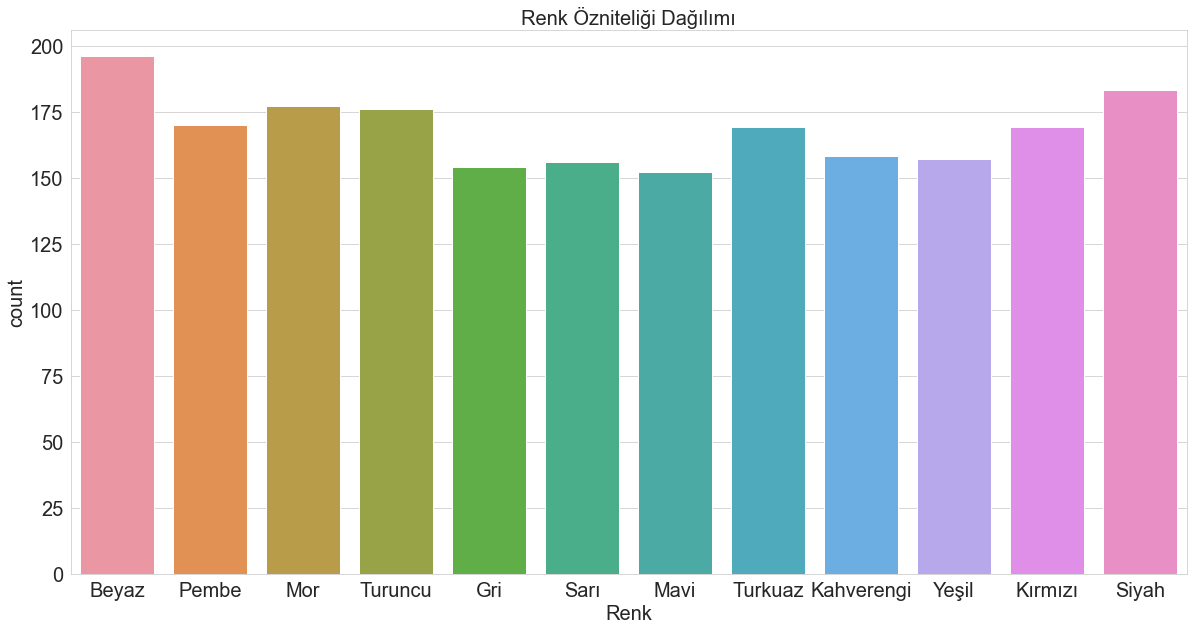

In [36]:
sns.countplot(df["Renk"])
plt.title("Renk Özniteliği Dağılımı")
plt.show()

> - Renk özniteliği incelendiğinde, beyaz renkli tabletler çoğunluktadır. Yaklaşık olarak dengeli bir dağılım gözlemlenmektedir.

**Fiyat Aralığı Özniteliği**

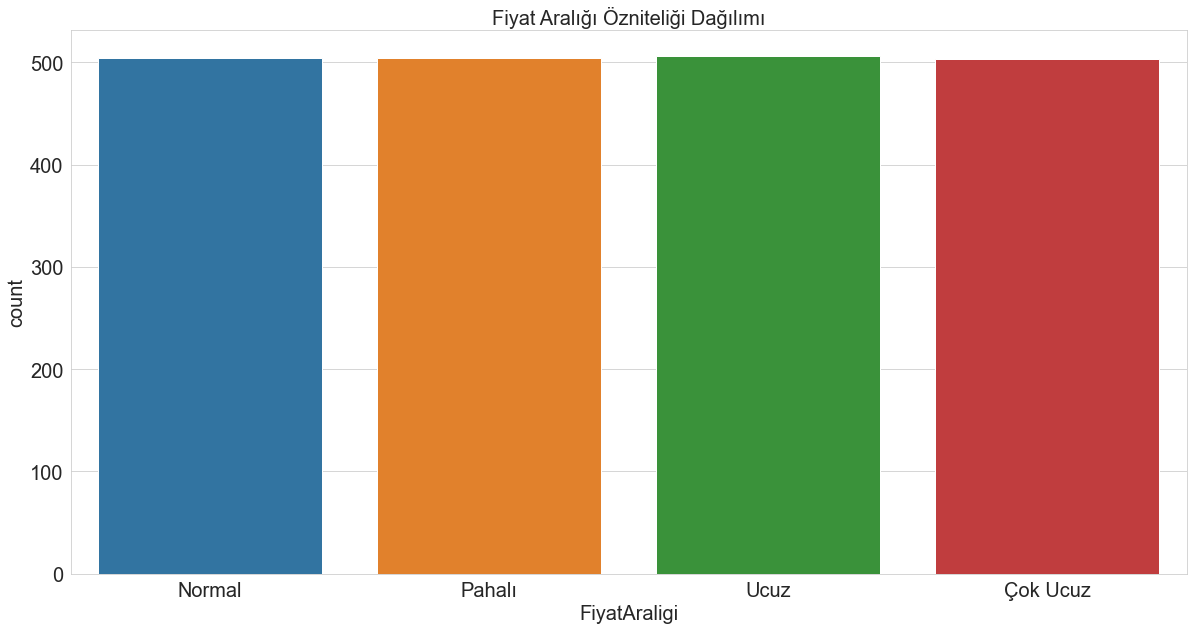

In [37]:
sns.countplot(df["FiyatAraligi"])
plt.title("Fiyat Aralığı Özniteliği Dağılımı")
plt.show()

> - Hedef değişken de tamamen dengeli dağılmıştır.

> - Kategorik değişkenlerin dağılım analizi burada sonlanmıştır. Yukarıda görüldüğü üzere 3G haricindeki öznitelikler de dengeli bir dağılım gözlemlenmiştir.

### Nümerik Özniteliklerin Dağılımı 

**Batarya Gücü Özniteliği**

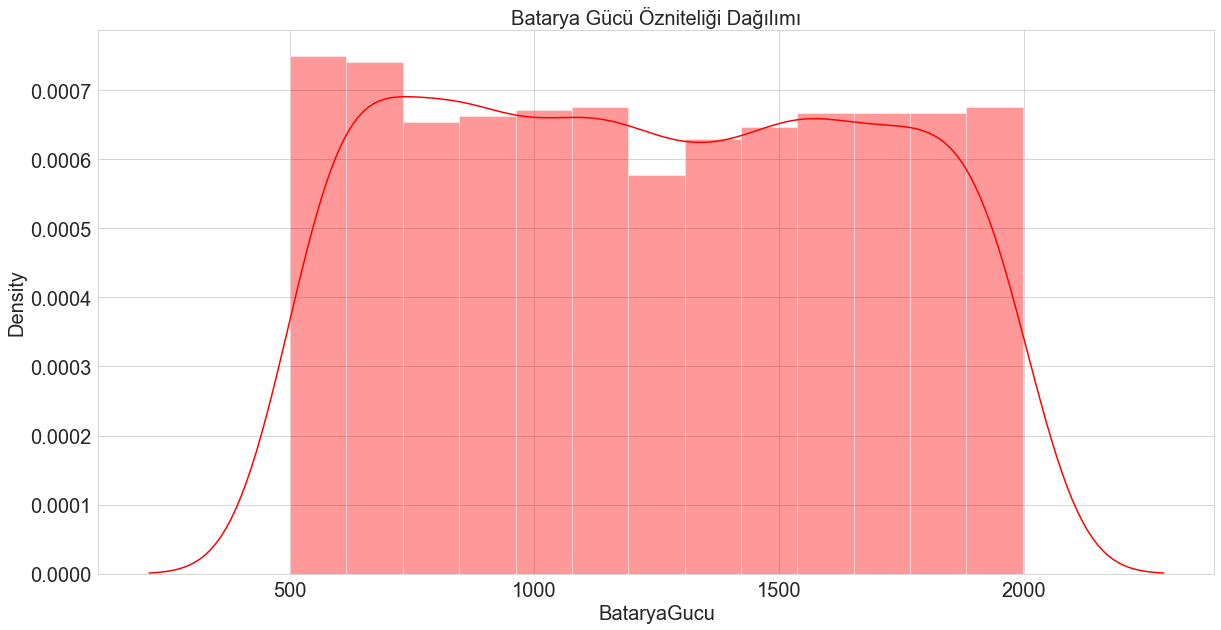

In [38]:
sns.distplot(df["BataryaGucu"], color="red")
plt.title("Batarya Gücü Özniteliği Dağılımı")
plt.show()

> - Dengeli bir dağılım gözlemlenmektedir. 
> - Batarya gücü 500 ile 2000 aralığında dağılım göstermektedir.

**Mikro İşlemci Hızı Özniteliği**

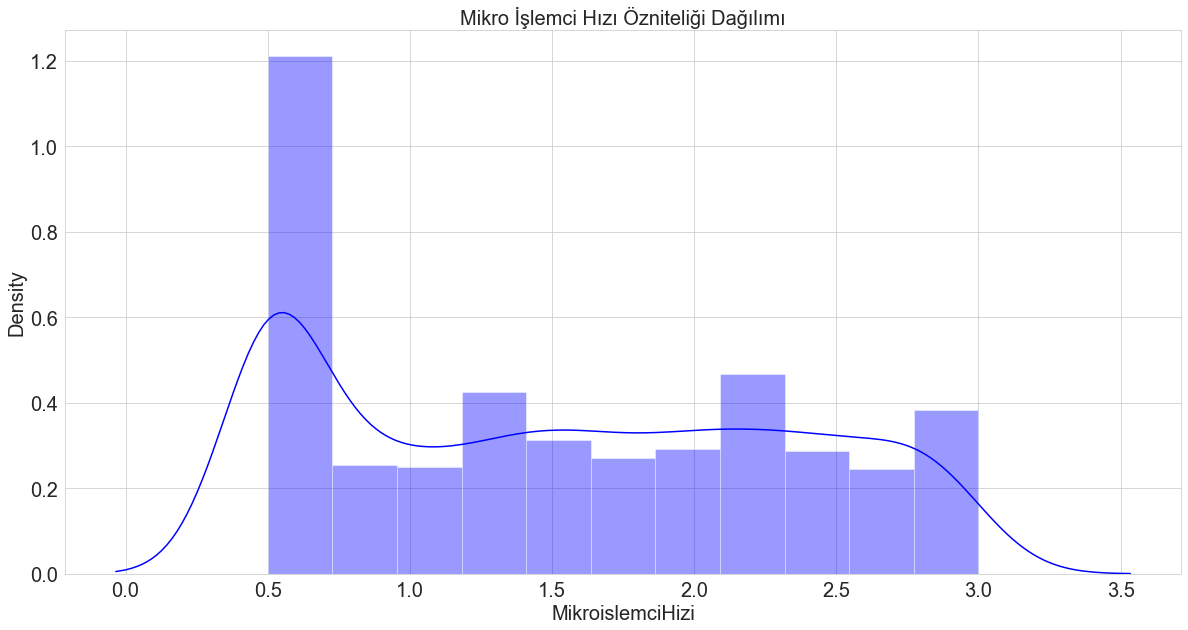

In [39]:
sns.distplot(df["MikroislemciHizi"], color="blue")
plt.title("Mikro İşlemci Hızı Özniteliği Dağılımı")
plt.show()

> - Mikro işlemci hızı özniteliği 0.5 ile 3 arasında dağılım göstermektedir. 
> - Yoğunlukla 0.5 ile 0.75 arasında dağılım göstermektedir. 

**Ön Kamera Özniteliği**

In [40]:
df['OnKameraMP'] = df['OnKameraMP'].str.replace(',', '.').astype(float)

> - Ön kamera mp özniteliğinde virgül ile ayrılan gözlemlerdeki virgülü nokta ile değiştirme işlemi gerçekleştirilmiştir.

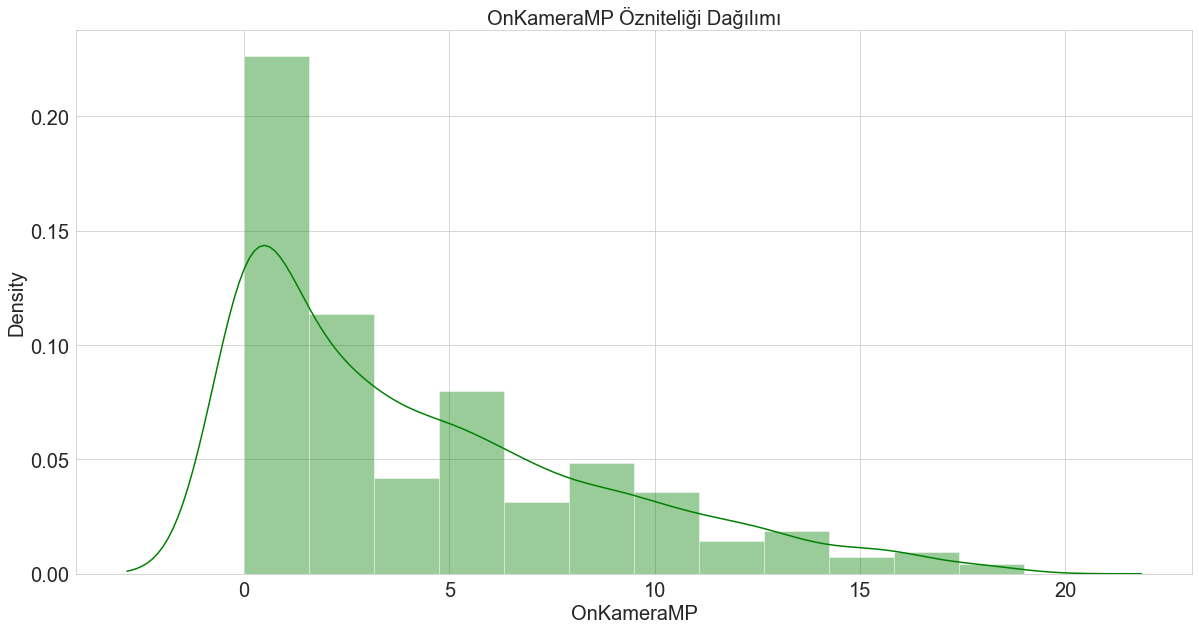

In [41]:
sns.distplot(df["OnKameraMP"], bins=12, color="green")
plt.title("OnKameraMP Özniteliği Dağılımı")
plt.show()

> - Ön kamera özniteliğinde yoğunlukla ön kameranın olmadığı gözlemlenmiştir.
> - 0 ile 20 mp aralığında dağılım göstermektedir. 
> - Sağ çarpık bir dağılım gözlemlenmektedir.

**Arka Kamera Özniteliği**

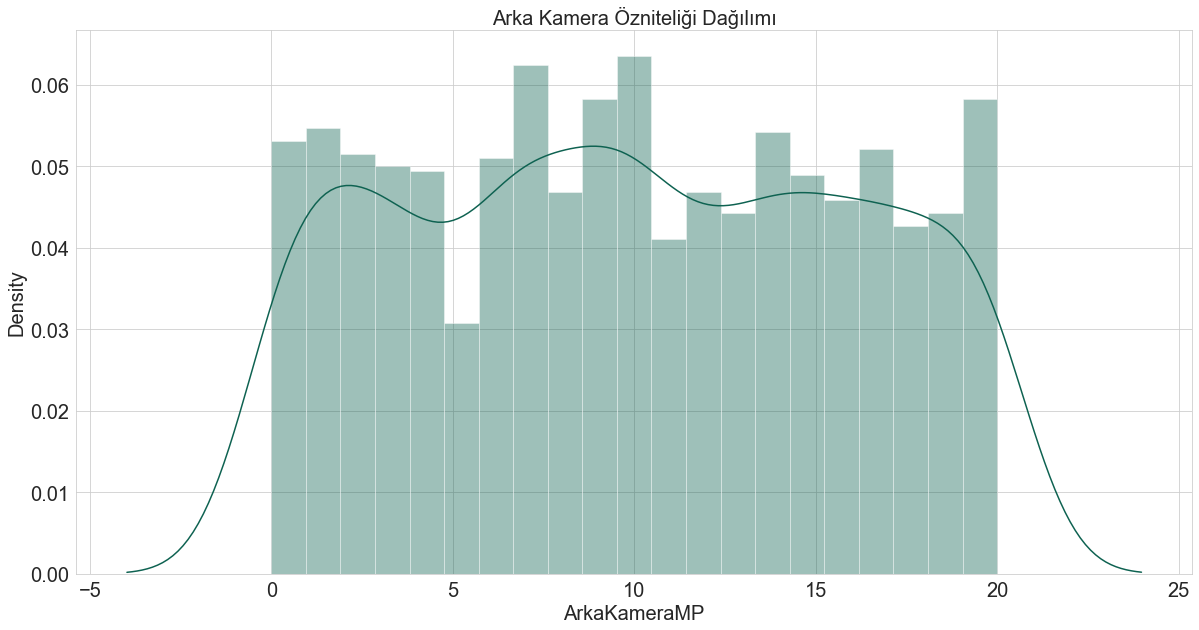

In [42]:
sns.distplot(df["ArkaKameraMP"], bins=21, color="#0E6251")
plt.title("Arka Kamera Özniteliği Dağılımı")
plt.show()

> - Tabletler de 0 ile 20 mp aralığında arka kamera bulunmaktadır. Dengeli bir dağılım gözlemlenmektedir.

**Dahili Bellek Özniteliği**

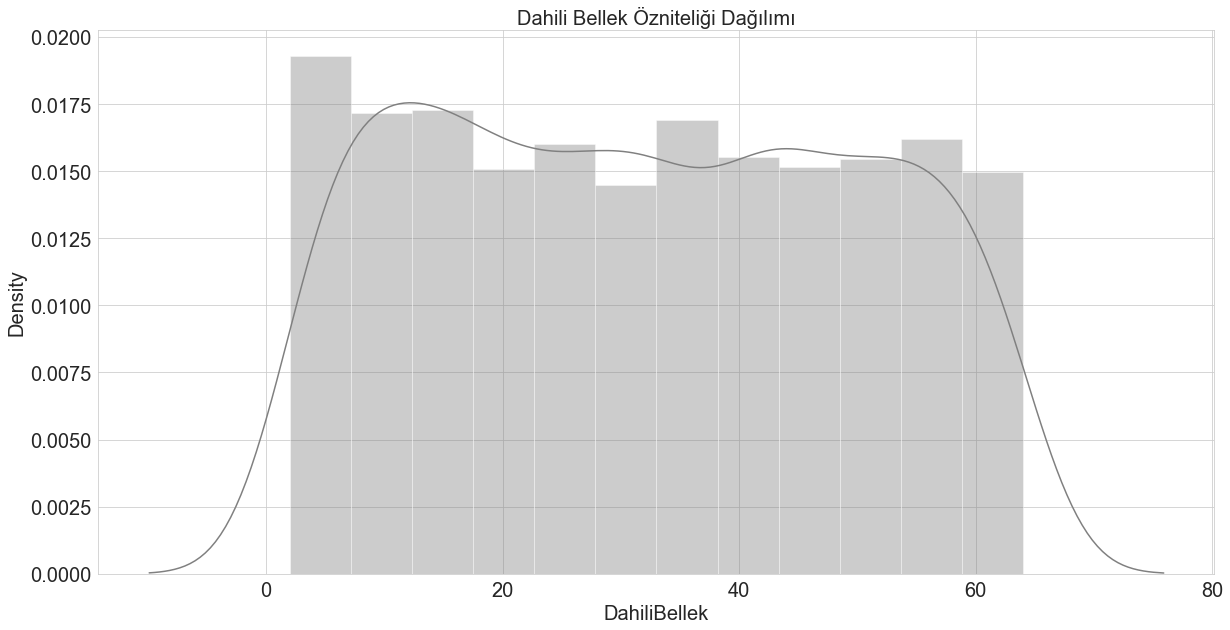

In [43]:
sns.distplot(df["DahiliBellek"], bins=12, color="gray")
plt.title("Dahili Bellek Özniteliği Dağılımı")
plt.show()

> - 0 ile 60 aralığında dağılım gözlemlenmektedir. Dengeli bir dağılım gözlemlenmektedir.

**Kalınlık Özniteliği**

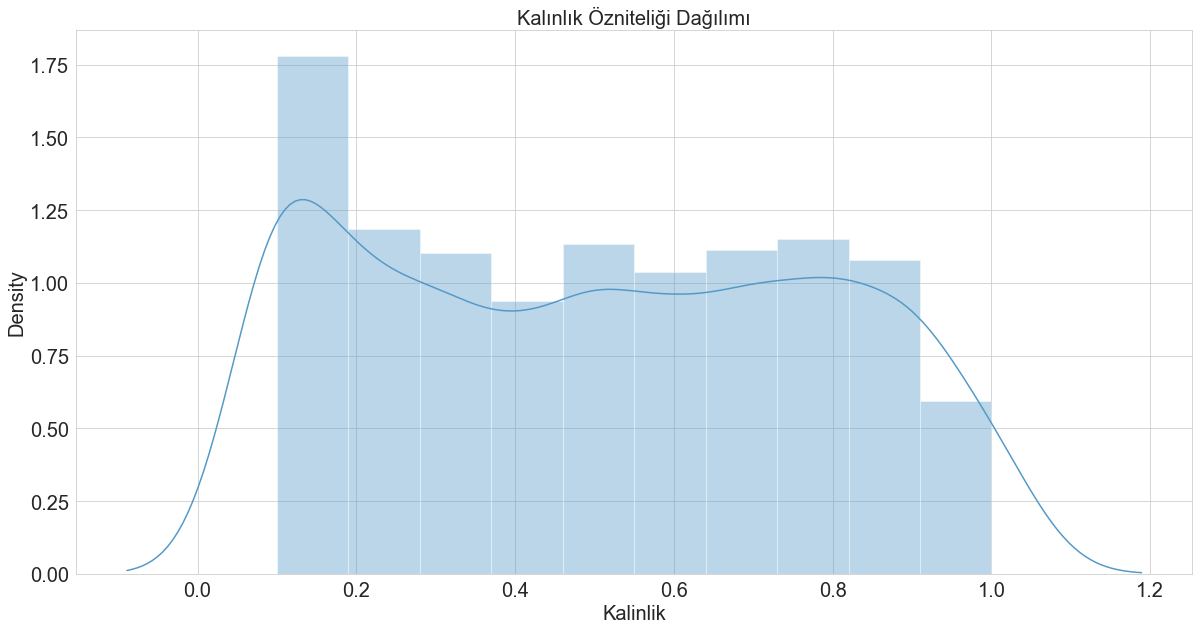

In [44]:
sns.distplot(df["Kalinlik"], bins=10, color="#5499C7")
plt.title("Kalınlık Özniteliği Dağılımı")
plt.show()

> - 0.1 ile 1 aralığında dağılım gözlemlenmektedir. Yoğun olarak 0.1 kalınlığında tabletler bulunmaktadır.

**Ağırlık Özniteliği**

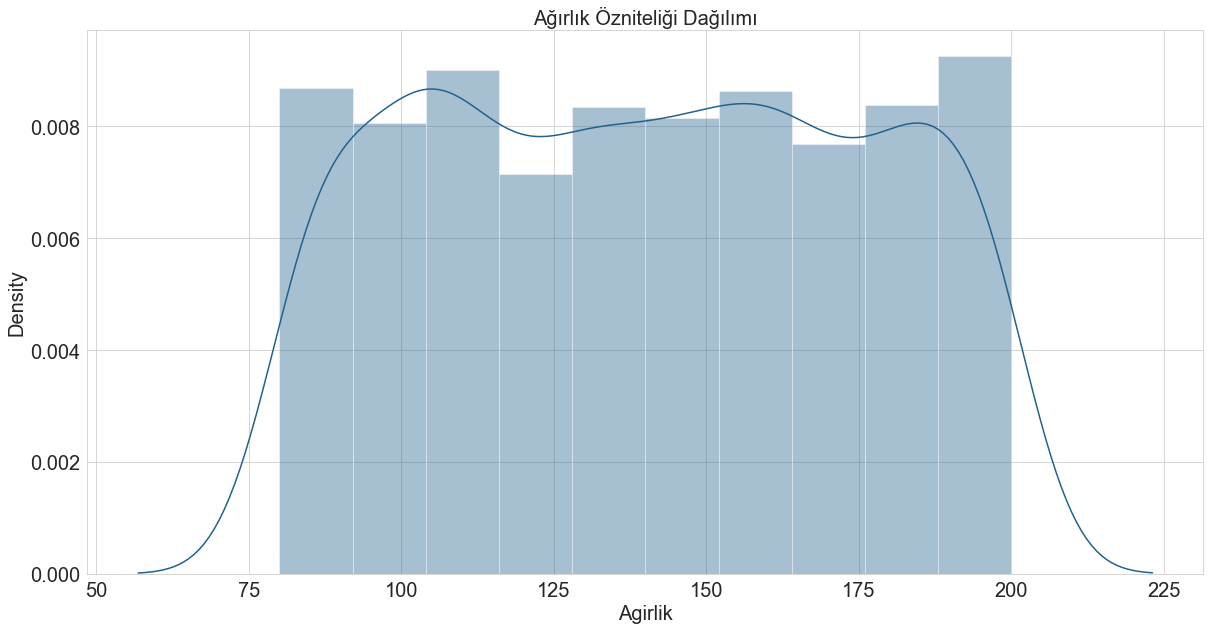

In [45]:
sns.distplot(df["Agirlik"], bins=10, color="#21618C")
plt.title("Ağırlık Özniteliği Dağılımı")
plt.show()

> - 80 ile 200 gram aralığında dağılım gözlemlenmektedir. Dengeli bir dağılım gözlemlenmektedir.

**Çekirdek Sayısı Özniteliği**

In [46]:
df["CekirdekSayisi"].unique()

array([1, 8, 7, 3, 4, 6, 5, 2], dtype=int64)

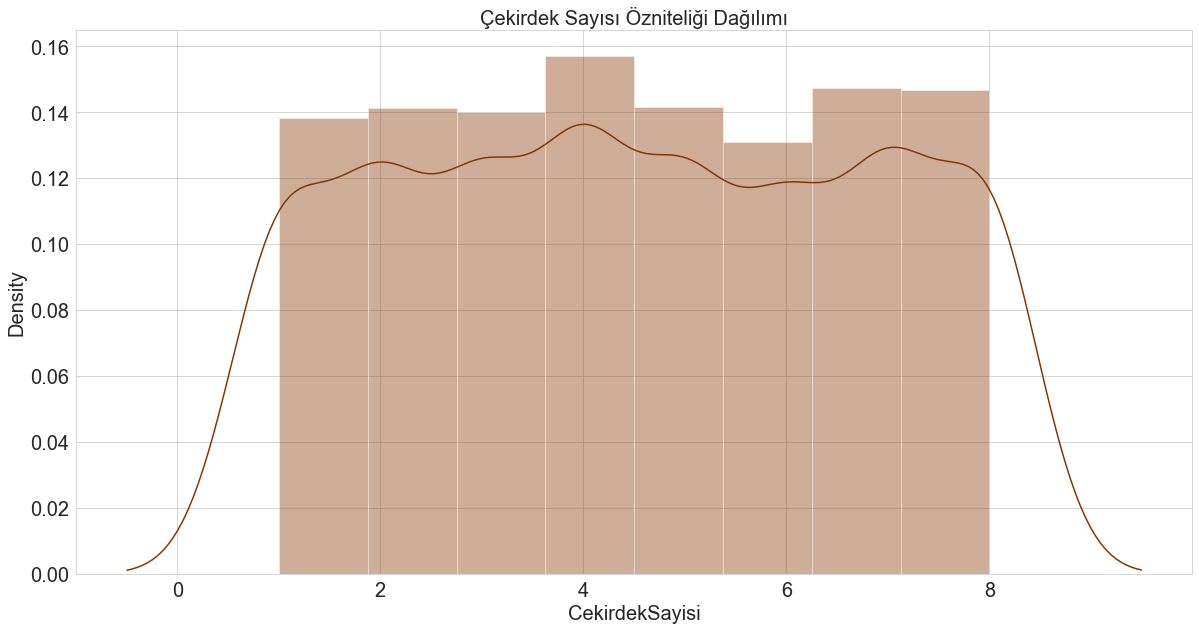

In [47]:
sns.distplot(df["CekirdekSayisi"], bins=8, color="#873600")
plt.title("Çekirdek Sayısı Özniteliği Dağılımı")
plt.show()

> - Tabletlerde 0 ile 8 aralığında çekirdek bulunmaktadır. Dengeli bir dağılım gözlemlenmektedir.

**Çözünürlük Yüksekliği Özniteliği**

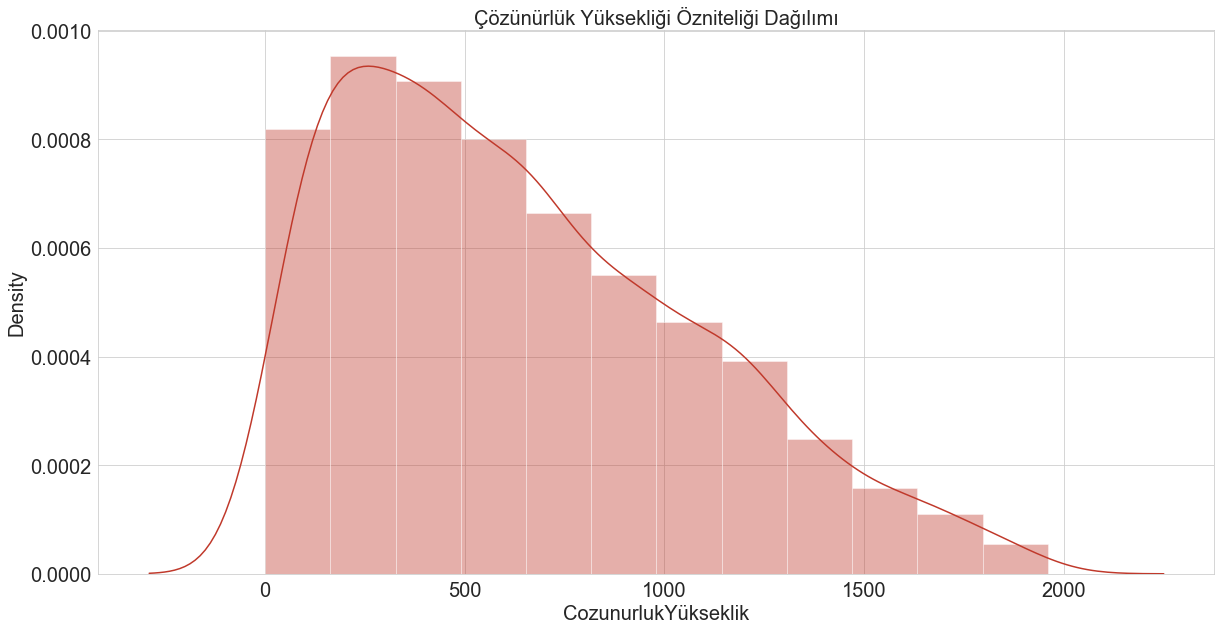

In [48]:
sns.distplot(df["CozunurlukYükseklik"], bins=12, color="#C0392B")
plt.title("Çözünürlük Yüksekliği Özniteliği Dağılımı")
plt.show()

> - Tabletlerin çözünürlük yüksekliği dağılımı 0 ile 2000 aralığındadır. 
> - Sağ çarpık bir dağılım gözlemlenmektedir.

**Çözünürlük Genişliği Özniteliği**

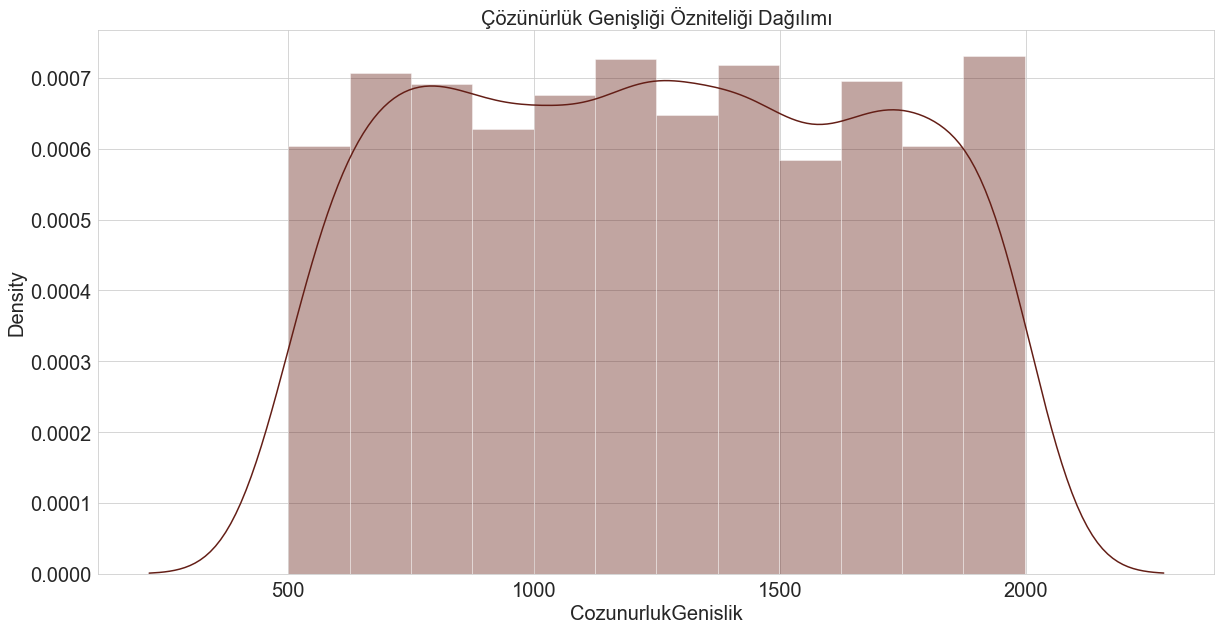

In [49]:
sns.distplot(df["CozunurlukGenislik"], bins=12, color="#641E16")
plt.title("Çözünürlük Genişliği Özniteliği Dağılımı")
plt.show()

> - Tabletlerin çözünürlük genişliği dağılımı 0 ile 2000 aralığındadır. Dengeli bir dağılım gözlemlenmektedir.

**Batarya Ömrü Özniteliği**

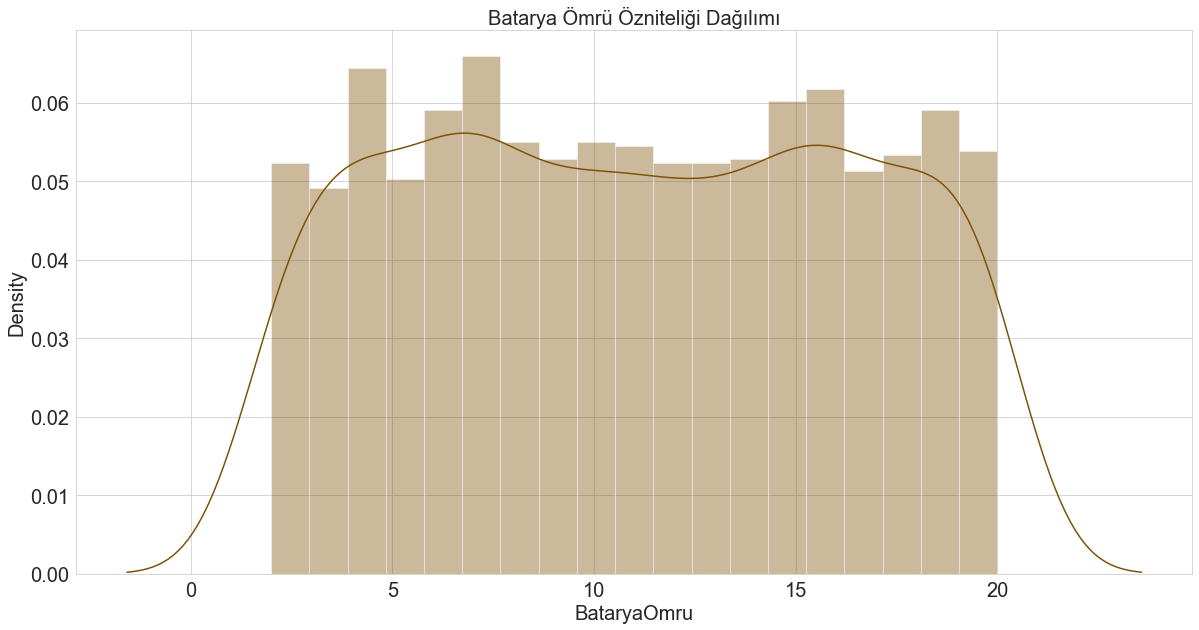

In [50]:
sns.distplot(df["BataryaOmru"], bins=19, color="#7E5109")
plt.title("Batarya Ömrü Özniteliği Dağılımı")
plt.show()

> - Tabletlerin batarya ömrü dağılımı 2 ile 20 aralığındadır. Dengeli bir dağılım gözlemlenmektedir.

**Ram Özniteliği**

In [51]:
df['RAM'] = df['RAM'].str.replace(',', '.').astype(float)

> - Ram özniteliğinde virgül ile ayrılan gözlemlerdeki virgülü nokta ile değiştirme işlemi gerçekleştirilmiştir.

In [52]:
df["RAM"].describe()

count    2005.000000
mean     2116.214963
std      1080.550758
min       256.000000
25%      1206.000000
50%      2129.000000
75%      3038.000000
max      3998.000000
Name: RAM, dtype: float64

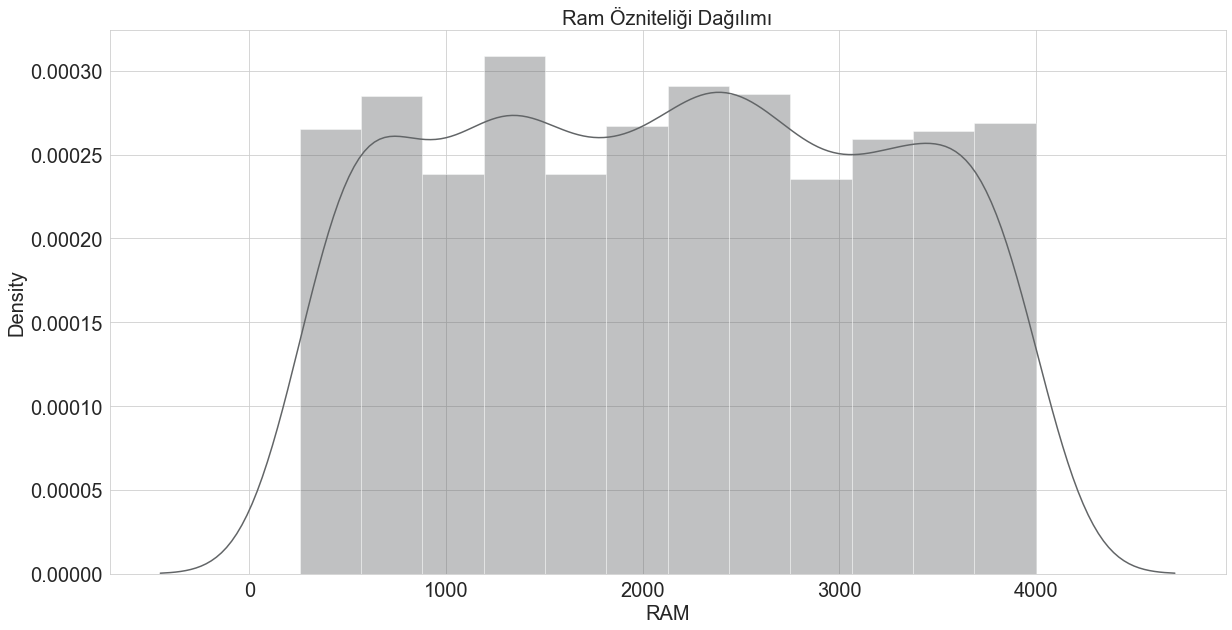

In [53]:
sns.distplot(df["RAM"], bins=12, color="#626567")
plt.title("Ram Özniteliği Dağılımı")
plt.show()

> - Tabletlerin ram dağılımı 256 ile 4000 mb aralığındadır. Dengeli bir dağılım gözlemlenmektedir.

### Çok Değişkenli İlişki Analizi

### Korelasyon Analizi

In [54]:
df.corr()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.010013,0.030703,-0.005186,0.038701,0.002112,-0.025880,0.028045,0.018123,-0.004072,-0.002522,0.054414
MikroislemciHizi,0.010013,1.000000,-0.001505,0.009298,-0.014115,0.017426,-0.008593,-0.001952,-0.014075,-0.008359,0.005210,-0.013077
OnKameraMP,0.030703,-0.001505,1.000000,-0.030821,-0.001253,0.024343,-0.014115,0.646192,-0.007627,-0.006099,0.012228,-0.006648
DahiliBellek,-0.005186,0.009298,-0.030821,1.000000,0.006057,-0.031244,-0.032539,-0.034078,0.011051,-0.006969,0.034103,-0.006422
Kalinlik,0.038701,-0.014115,-0.001253,0.006057,1.000000,0.022261,-0.002537,0.026182,0.028200,0.026255,-0.007593,0.020225
Agirlik,0.002112,0.017426,0.024343,-0.031244,0.022261,1.000000,-0.021263,0.021880,0.001743,0.002581,0.000264,0.004735
CekirdekSayisi,-0.025880,-0.008593,-0.014115,-0.032539,-0.002537,-0.021263,1.000000,-0.003461,-0.006443,0.023744,0.005612,0.014718
ArkaKameraMP,0.028045,-0.001952,0.646192,-0.034078,0.026182,0.021880,-0.003461,1.000000,-0.017329,0.002903,0.030374,0.013355
CozunurlukYükseklik,0.018123,-0.014075,-0.007627,0.011051,0.028200,0.001743,-0.006443,-0.017329,1.000000,0.512010,-0.024182,-0.007949
CozunurlukGenislik,-0.004072,-0.008359,-0.006099,-0.006969,0.026255,0.002581,0.023744,0.002903,0.512010,1.000000,0.001420,0.009453


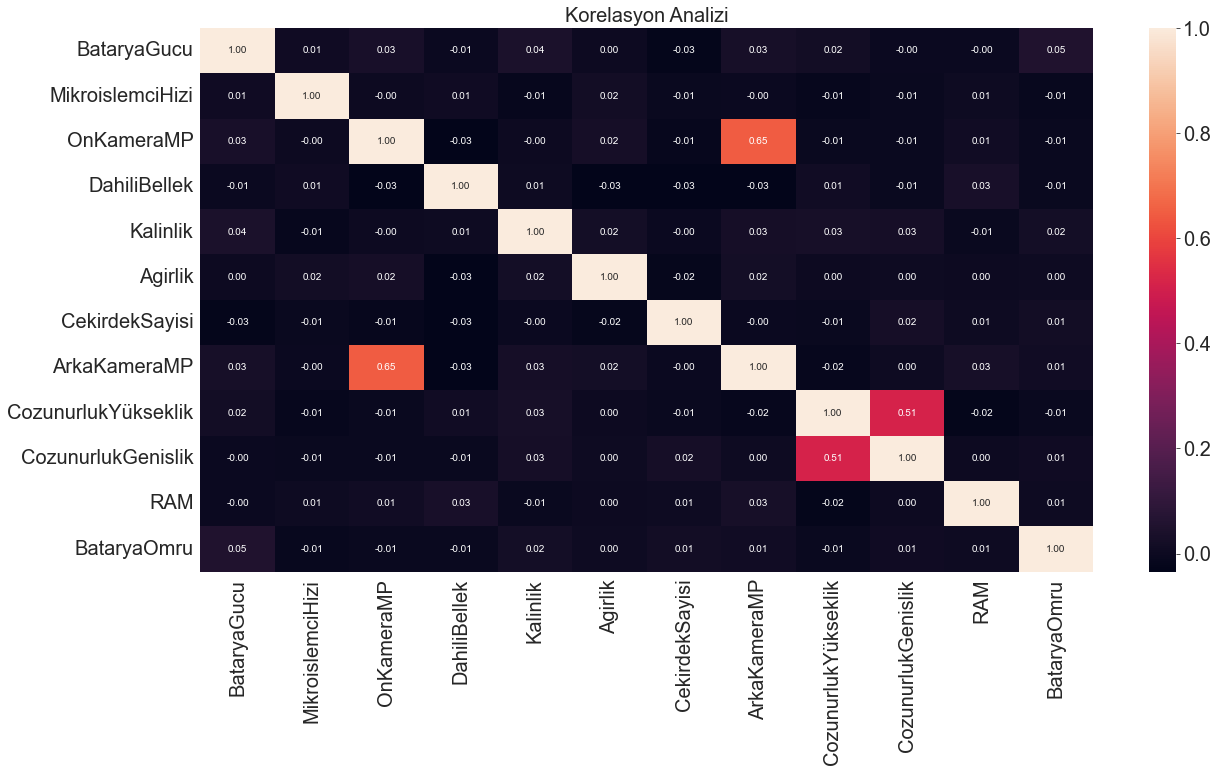

In [55]:
corr=df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f')
plt.title("Korelasyon Analizi")
plt.show()

> - Ön Kamera mp ile arka kamera mp arasında pearson korelasyonuna göre güçlü pozitif bir ilişki bulunmaktadır.
> - Çözünürlük genişliği ile çözünürlük yüksekliği arasında orta şiddette pozitif bir ilişki bulunmaktadır.

**Arka Kamera Mp ile Ön Kamera Mp Özniteliklerinin İlişki Analizi.**

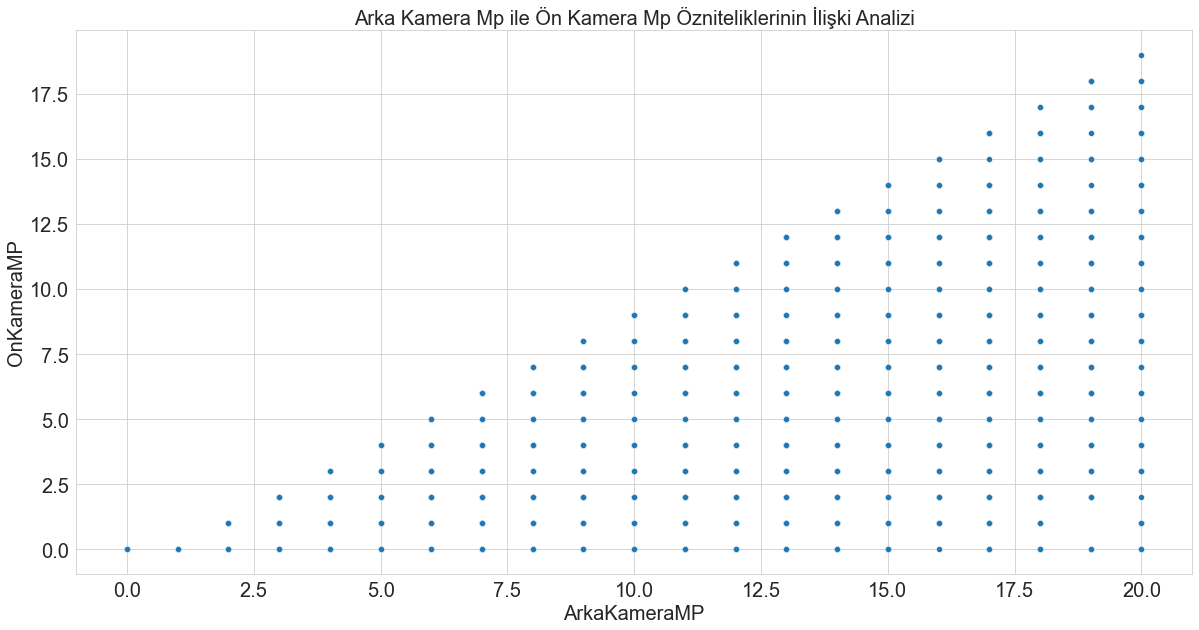

In [56]:
sns.scatterplot(x="ArkaKameraMP",y="OnKameraMP", data=df)
plt.title("Arka Kamera Mp ile Ön Kamera Mp Özniteliklerinin İlişki Analizi")
plt.show()

> - Arka kamera mp'nin yüksek olduğu tabletlerde ön kamera mp'de yüksek olmaktadır. Korelasyon analizinde görülen pozitif güçlü  ilişki burada da teyit edilmiştir.

### Hedef Özniteliğin Diğer Özniteliklerle Olan İlişkisi

**Hedef Özniteliğin Sınıflarına Göre Nümerik Öznitelikler ile Olan İlişkisi**

In [57]:
fiyat_araligi_siralama = ["Çok Ucuz","Ucuz","Normal","Pahalı"]

**Ram ile Hedef Değişken Arasındaki İlişki**

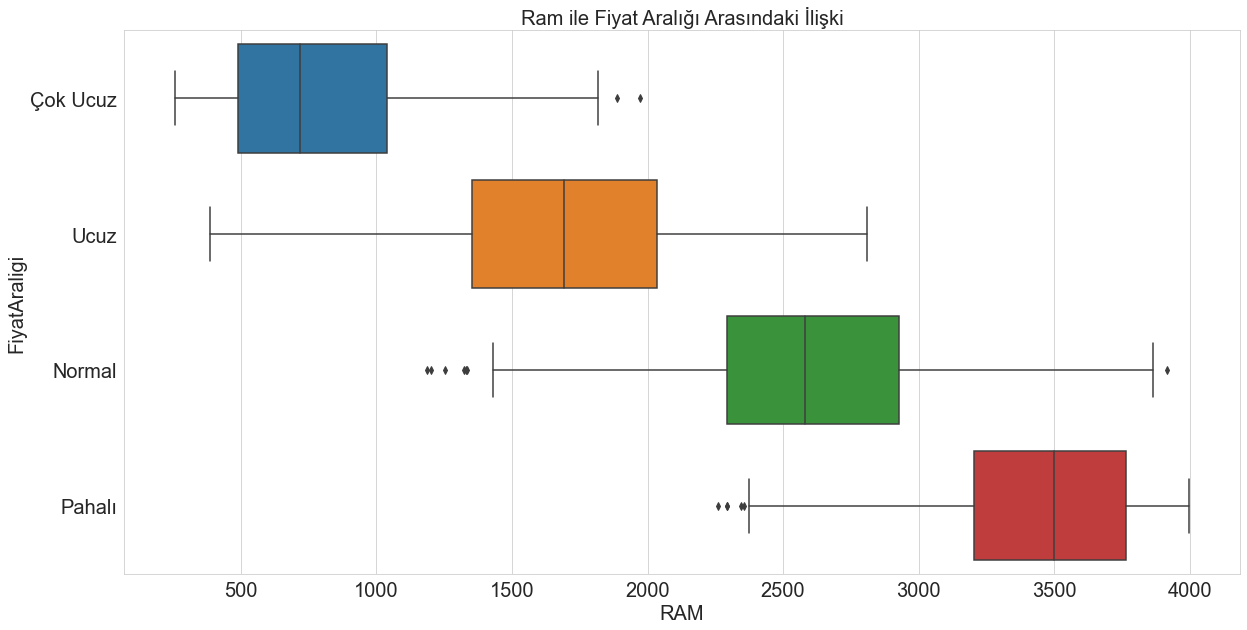

In [58]:
sns.boxplot(x="RAM", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Ram ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı yükseldikçe ram değerinde artış meydana gelmiştir.<br/>
> - Fiyat aralığı kategorisini belirleyici bir özniteliktir.

**Batarya Gücü ile Hedef Değişken Arasındaki İlişki**

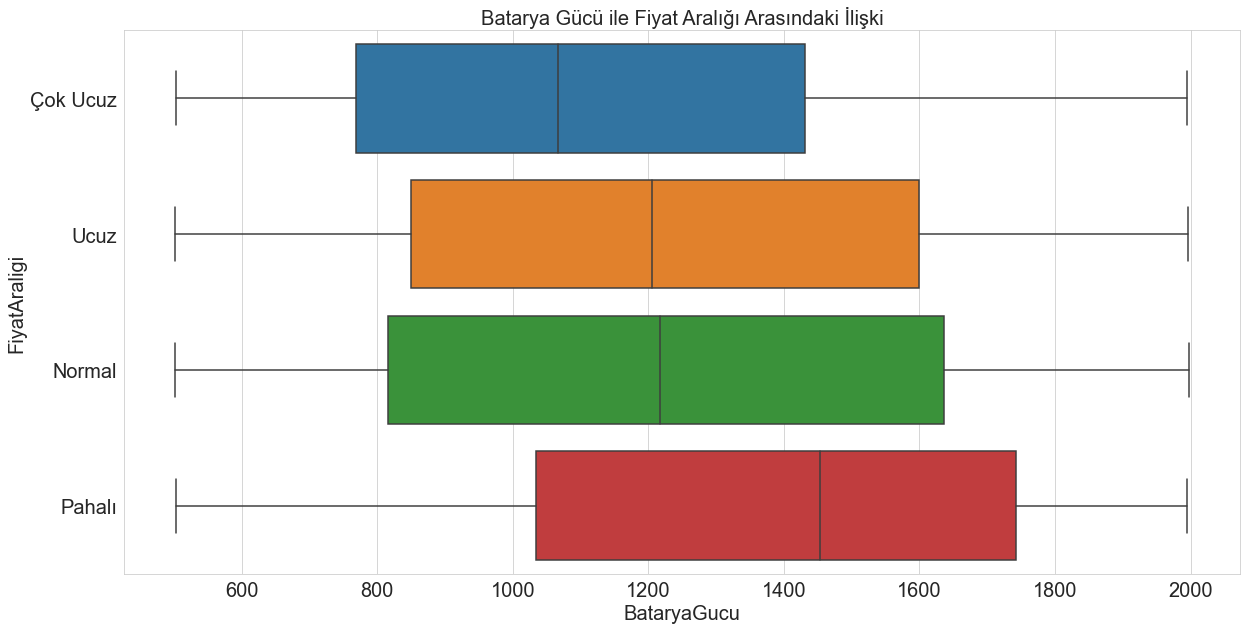

In [59]:
sns.boxplot(x="BataryaGucu", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Batarya Gücü ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı çok ucuz kategorisinden pahalı kategorisine yükseldikçe batarya gücünde artış gözlemlenmiştir.
> - Normal kategorisindeki tabletlerin batarya gücü aralığı, ucuz kategorisindeki tabletlerin batarya gücü aralığını kapsayıcıdır. Normal kategorisindeki tabletleri modelin ayırt etmesini zorlaştıracak bir durumdur. 

**Arka Kamera ile Hedef Değişken Arasındaki İlişki**

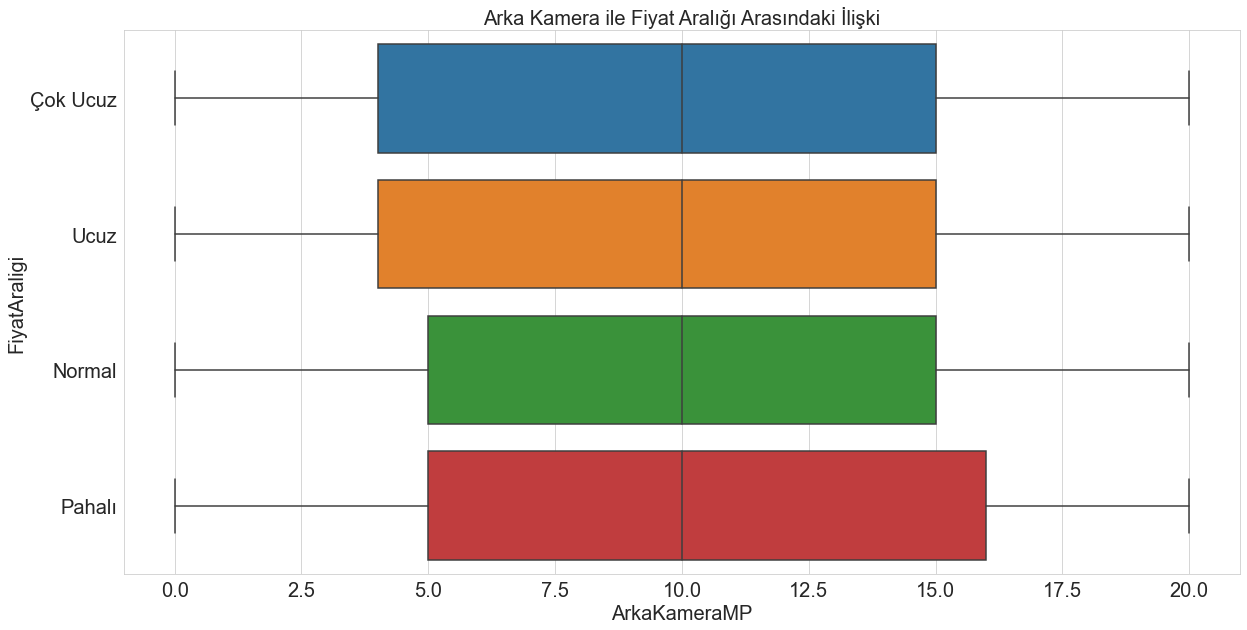

In [60]:
sns.boxplot(x="ArkaKameraMP", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Arka Kamera ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı çok ucuz ve ucuz kategorilerinde benzer dağılımlar gözlenmektedir. Fakat normal ve pahalı kategorilerine geçerken tabletlerin arka kamera mp değerlerinde artış gözlemlenmektedir. Bu durumda çok ucuz kategorisinden pahalı kategorisine yükseldikçe arka kamera değerlerinde artış meydana geldiği söylenebilir. Fakat kategoriler arası büyük ayrımlar söz konusu değildir.

**Dahili Bellek ile Hedef Değişken Arasındaki İlişki**

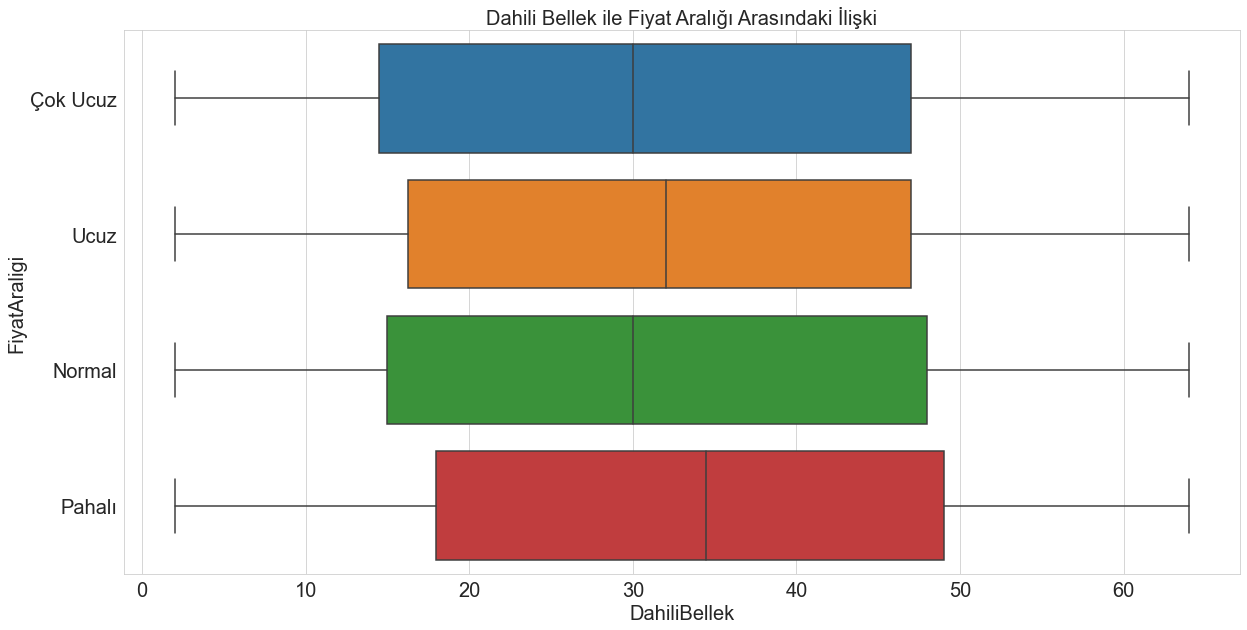

In [61]:
sns.boxplot(x="DahiliBellek", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Dahili Bellek ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı çok ucuz kategorisinden pahalı kategorisine yükseldikçe dahili bellekte artış gözlemlenmiştir.
> - Normal kategorisindeki tabletlerin dahili bellek değerleri daha geniş bir aralıkta dağılım göstermiştir. Ucuz kategorisindeki tabletlerin dahili bellek aralığını kapsamaktadır. Fakat q3 kuartiline bakıldığında ucuz kategorisine göre daha yüksek değerler aldığı gözlemlenmektedir.

**Çözünürlük Yüksekliği ile Hedef Değişken Arasındaki İlişki**

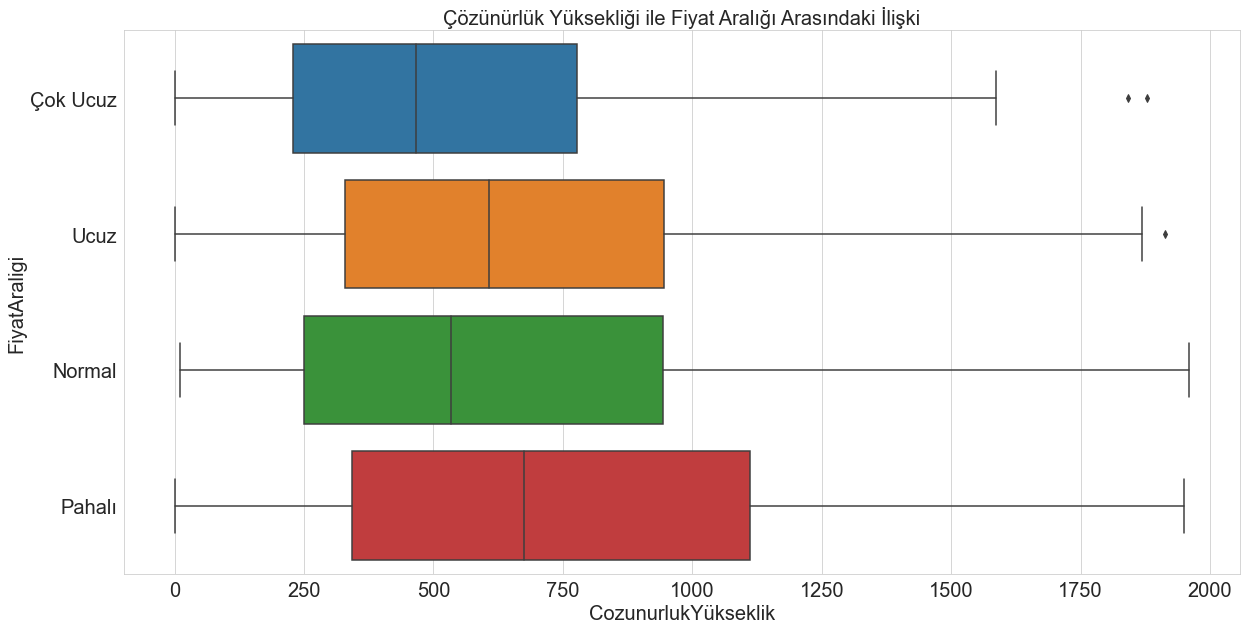

In [62]:
sns.boxplot(x="CozunurlukYükseklik", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Çözünürlük Yüksekliği ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Normal kategorisindeki tabletlerin çözünürlük yüksekliği aralığı çok geniştir.
> - Q3 kuartili üzerinden analiz yapıldığında çok ucuz kategorisinden pahalı kategorisine doğru çözünürlük yüksekliğinde artış olduğu gözlemlenmektedir.
> - Çok ucuz kategorisinden pahalı kategorisine doğru çözünürlük yüksekliğinde artış meydana gelmiştir. Sadece normal kategorisi çözünürlük aralığı daha geniş olduğu için ortalaması ve q1 değeri ucuz kategorisine göre düşük kalmıştır.

**Çözünürlük Genişliği ile Hedef Değişken Arasındaki İlişki**

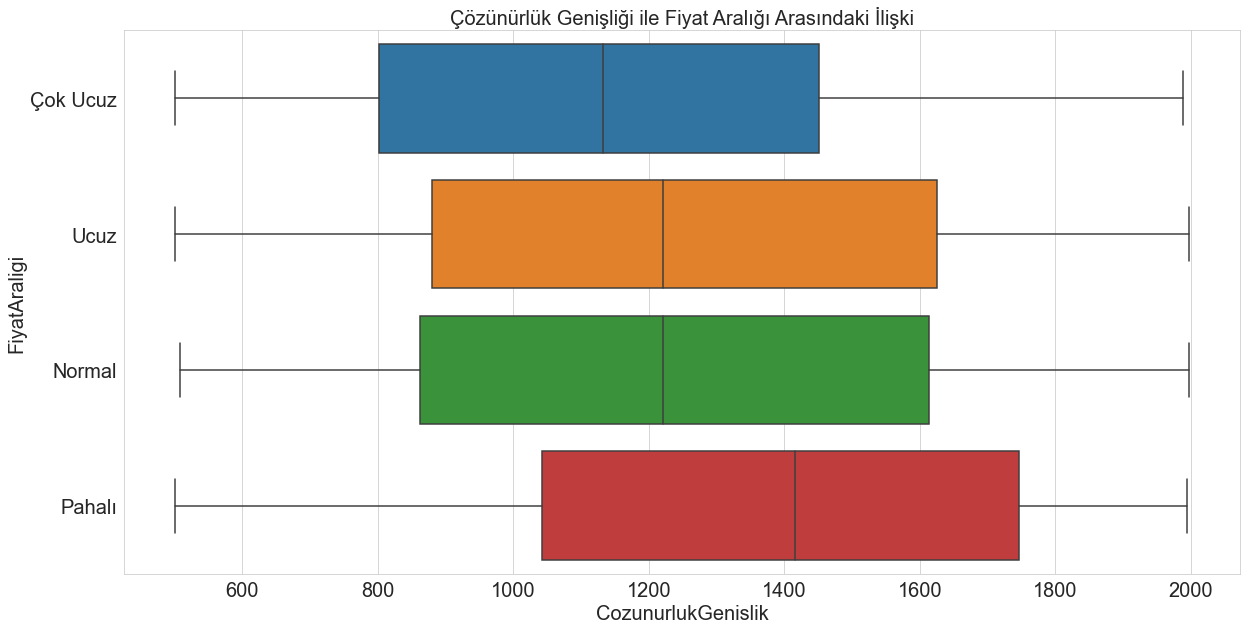

In [63]:
sns.boxplot(x="CozunurlukGenislik", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Çözünürlük Genişliği ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı çok ucuz kategorisinden pahalı kategorisine yükseldikçe çözünürlük genişliğinde artış meydana gelmiştir. Sadece normal kategorisindeki tabletler bu durumu bozmaktadır.

**Batarya Ömrü ile Hedef Değişken Arasındaki İlişki**

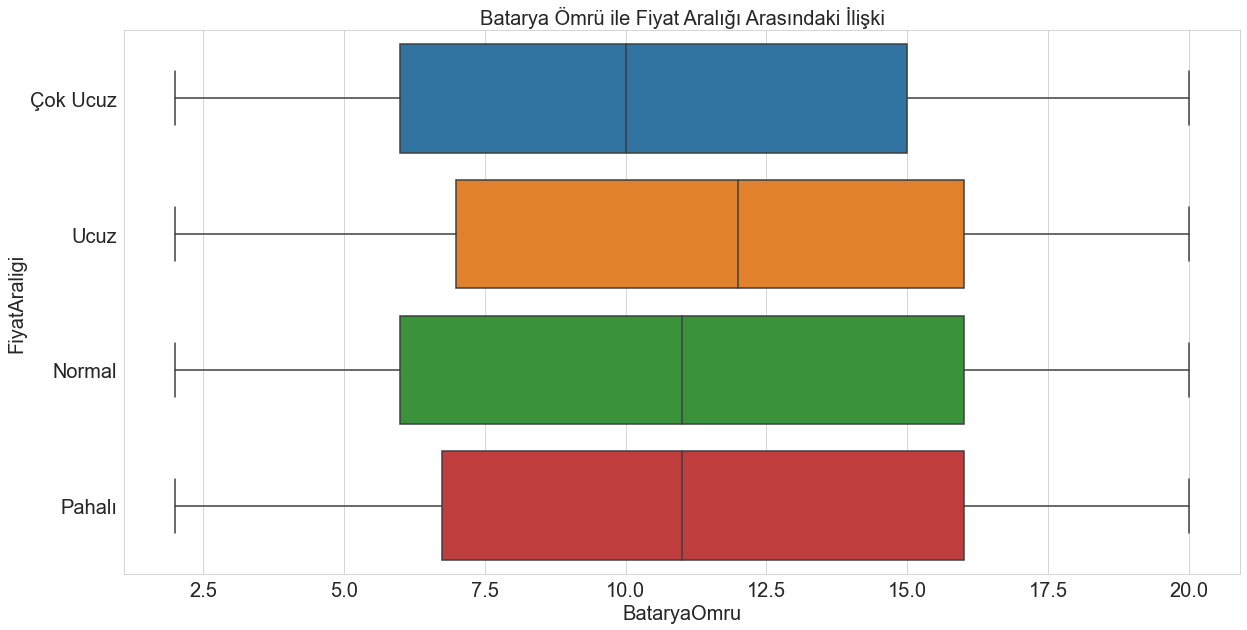

In [64]:
sns.boxplot(x="BataryaOmru", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Batarya Ömrü ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Batarya ömrü, fiyat aralığı çok ucuz kategorisinde diğer kategorilere göre daha düşük iken diğer kategorilerde birbirlerine yakın dağılımlar izlenmektedir.
> - Fiyat aralığı ile batarya ömrü arasında ilişki gözlemlenememektedir.

**Mikro İşlemci Hızı ile Hedef Değişken Arasındaki İlişki**

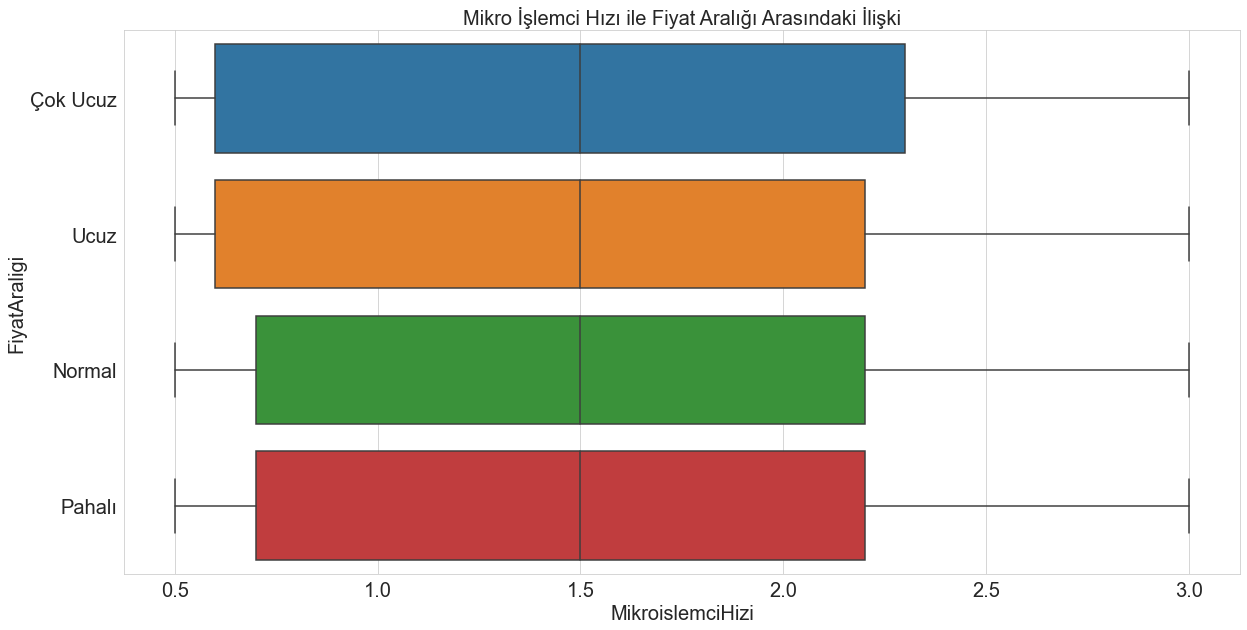

In [65]:
sns.boxplot(x="MikroislemciHizi", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Mikro İşlemci Hızı ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı ile mikro işlemci hızı arasındaki ilişki çok düşüktür. Sadece  normal ve pahalı kategorisindeki tabletlerin mikro işlemci hızı q1 kuartil değerleri çok ucuz ve ucuz kategorilerine göre daha yüksektir.

**Ön Kamera ile Hedef Değişken Arasındaki İlişki**

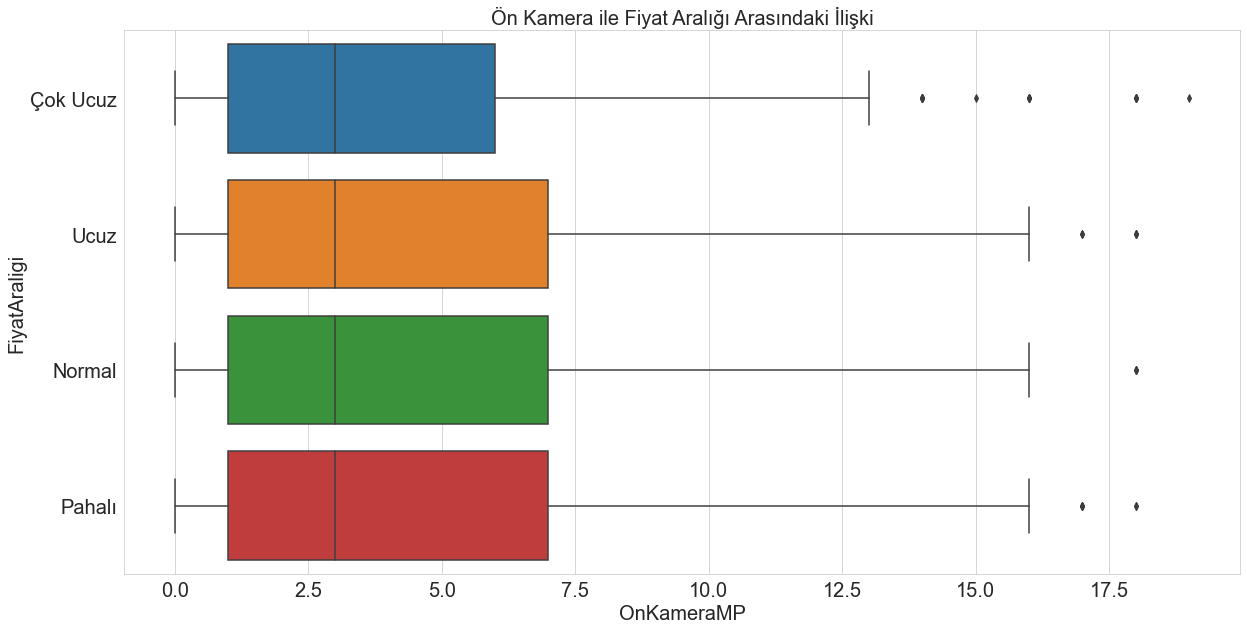

In [66]:
sns.boxplot(x="OnKameraMP", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Ön Kamera ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Çok ucuz kategorisideki ön kamera değer aralığı diğer kategorilere göre de daha düşüktür. Diğer kategorilerde birbirine yakın dağılımlar izlenmektedir

**Ağırlık ile Hedef Değişken Arasındaki İlişki**

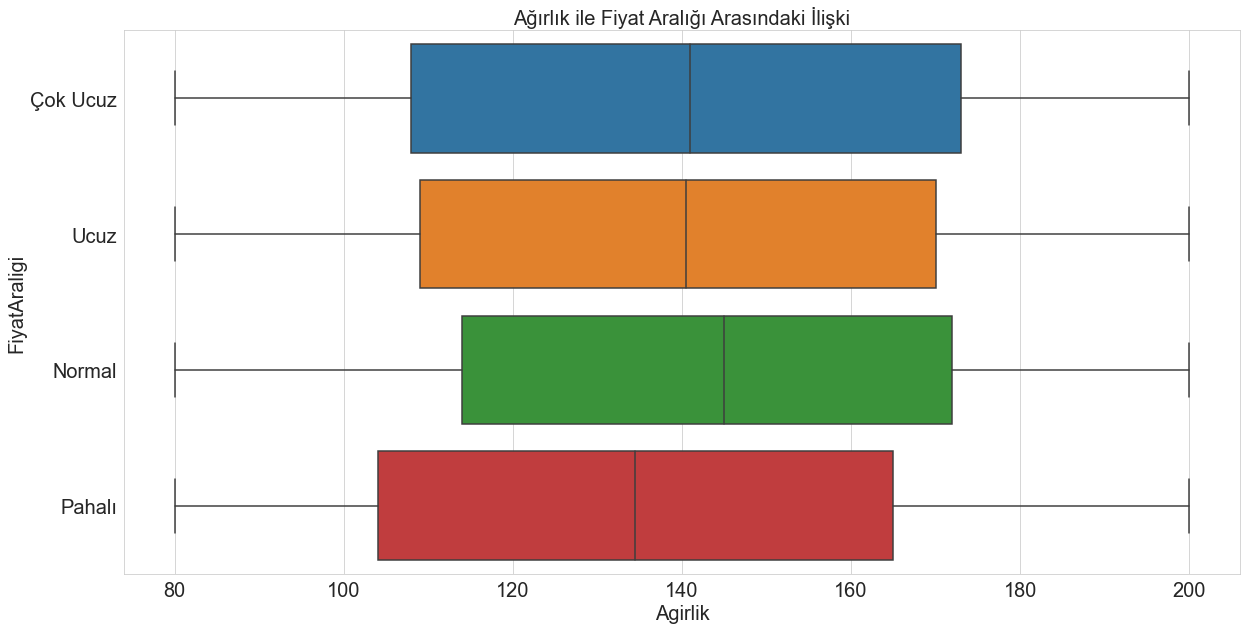

In [67]:
sns.boxplot(x="Agirlik", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Ağırlık ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Ağırlık özniteliği aslında birden çok özniteliğin sonucu niteliğindedir. Tablete eklenen fazla bir kamera veya daha ağır bir işlemci burada ağırlığı artırmaktadır.
> - Fiyat aralığı çok ucuz kategorisinden pahalı kategorisine yükseldikçe ağırlık artışı gözlemlenirken pahalı sınıfına geçtiğinde ağırlık ta azalma gözlemlenmiştir.
> - Bu durumda pahalı sınıfında kullanıcıların daha hafif tablet tercihi de göze alınıp bunun üzerine de arge yapıldığı düşünülmektedir.

**Kalınlık ile Hedef Değişken Arasındaki İlişki**

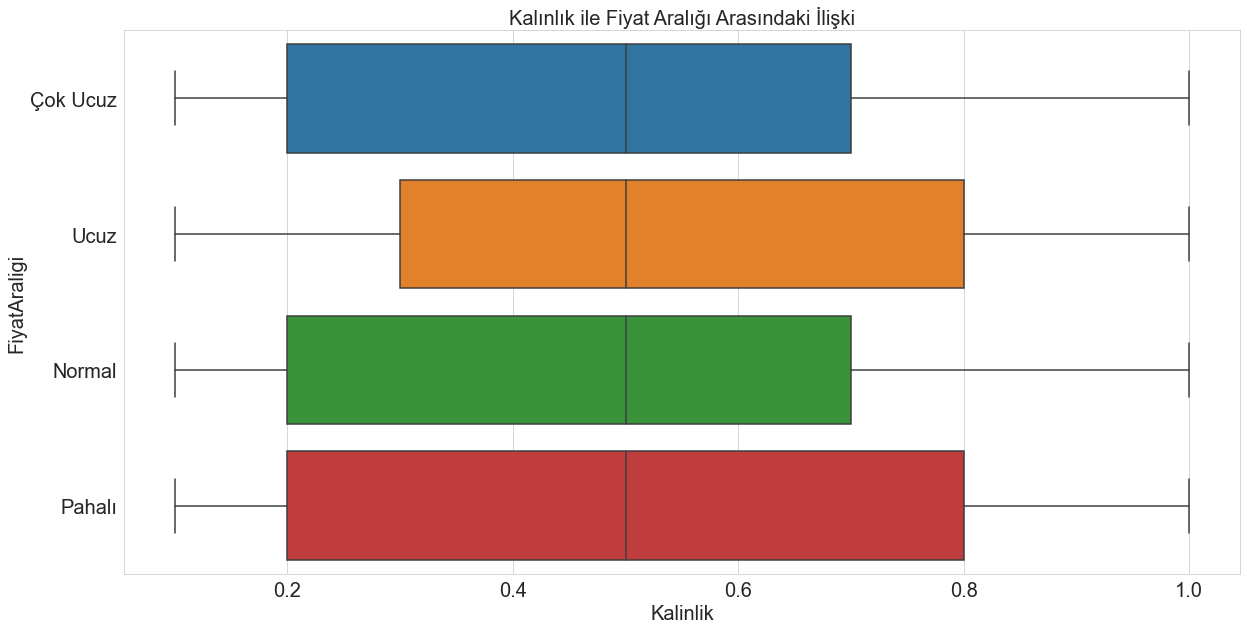

In [68]:
sns.boxplot(x="Kalinlik", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Kalınlık ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı ile kalınlık arasında ilişki gözlemlenememektedir.

**Çekirdek Sayısı ile Hedef Değişken Arasındaki İlişki**

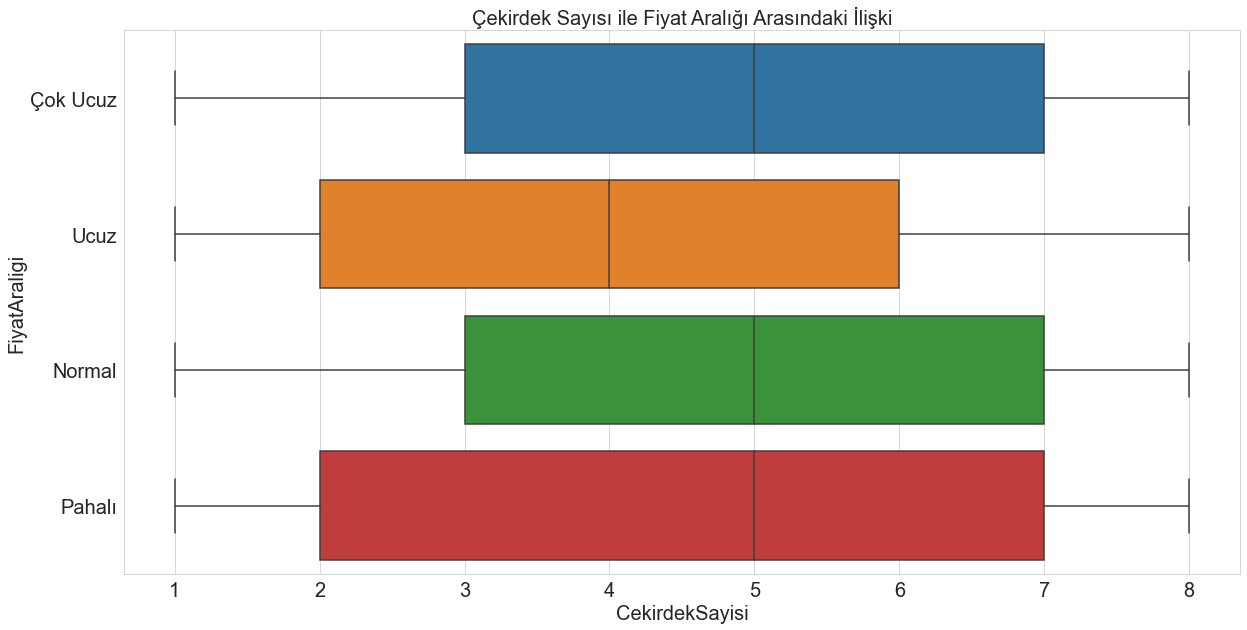

In [69]:
sns.boxplot(x="CekirdekSayisi", y="FiyatAraligi", data=df, order=fiyat_araligi_siralama)
plt.title("Çekirdek Sayısı ile Fiyat Aralığı Arasındaki İlişki")
plt.show()

> - Fiyat aralığı ile çekirdek sayısı arasında bir ilişki gözlemlenememektedir.

**Hedef Özniteliğin Sınıflarına Göre Kategorik Öznitelikler ile Olan İlişkisi**

**Bluetooth ile Hedef Öznitelik Arasındaki İlişki**

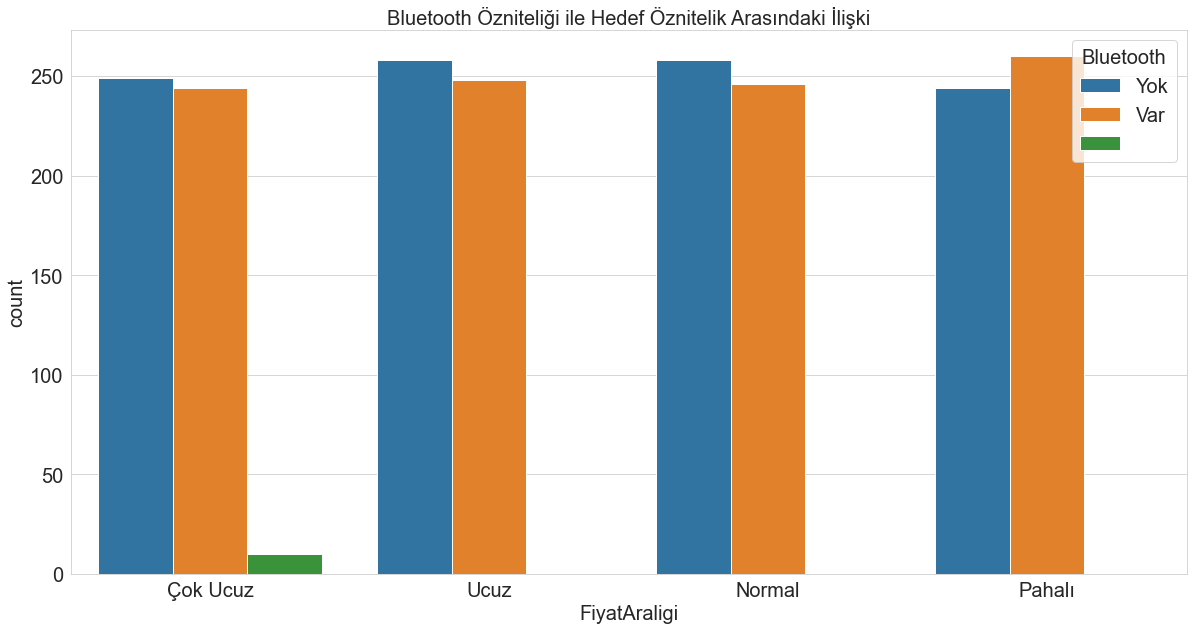

In [70]:
sns.countplot(df["FiyatAraligi"],hue=df["Bluetooth"], order=fiyat_araligi_siralama)
plt.title("Bluetooth Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

- Fiyata göre bluetooth olma durumu arasında bir ilişki bulunmamaktadır. Sadece pahalı sınıfında bluetooth özelliği bulunan tabletler daha fazladır fakat aradaki fark çok yüksek değildir.

**Çift Hat ile Hedef Öznitelik Arasındaki İlişki**

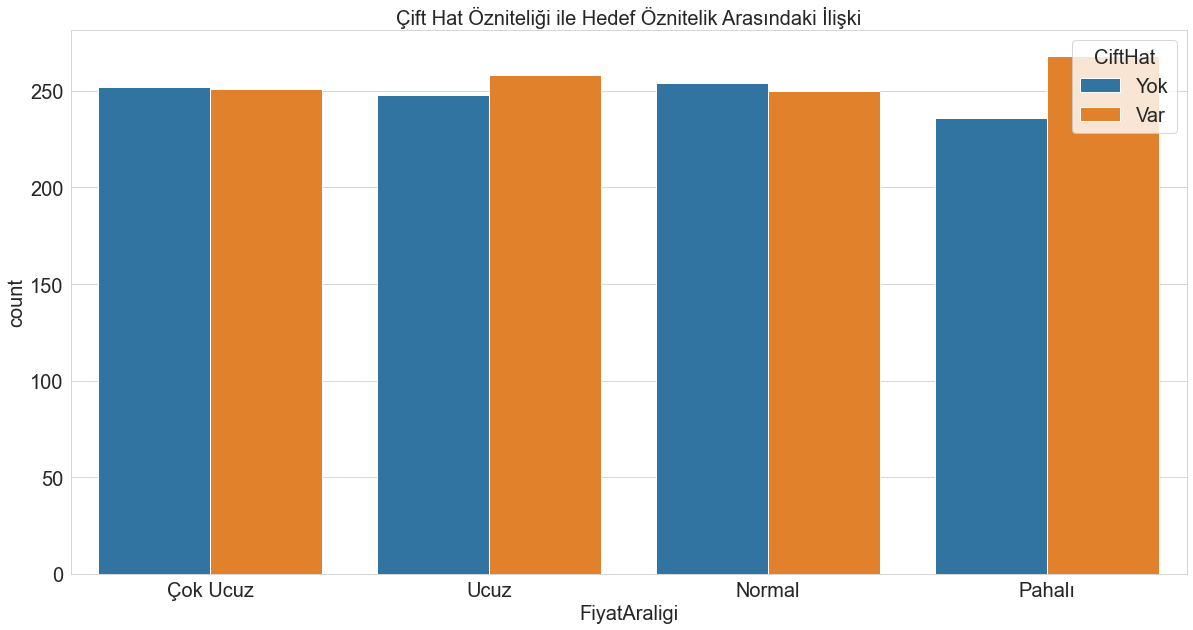

In [71]:
sns.countplot(df["FiyatAraligi"],hue=df["CiftHat"], order=fiyat_araligi_siralama)
plt.title("Çift Hat Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

- Fiyata göre çift hat olma durumu arasında bir ilişki bulunmamaktadır. Sadece pahalı sınıfında çift hat özelliği bulunan tabletler daha fazladır fakat yine aradaki fark çok yüksek değildir.

**4G ile Hedef Öznitelik Arasındaki İlişki**

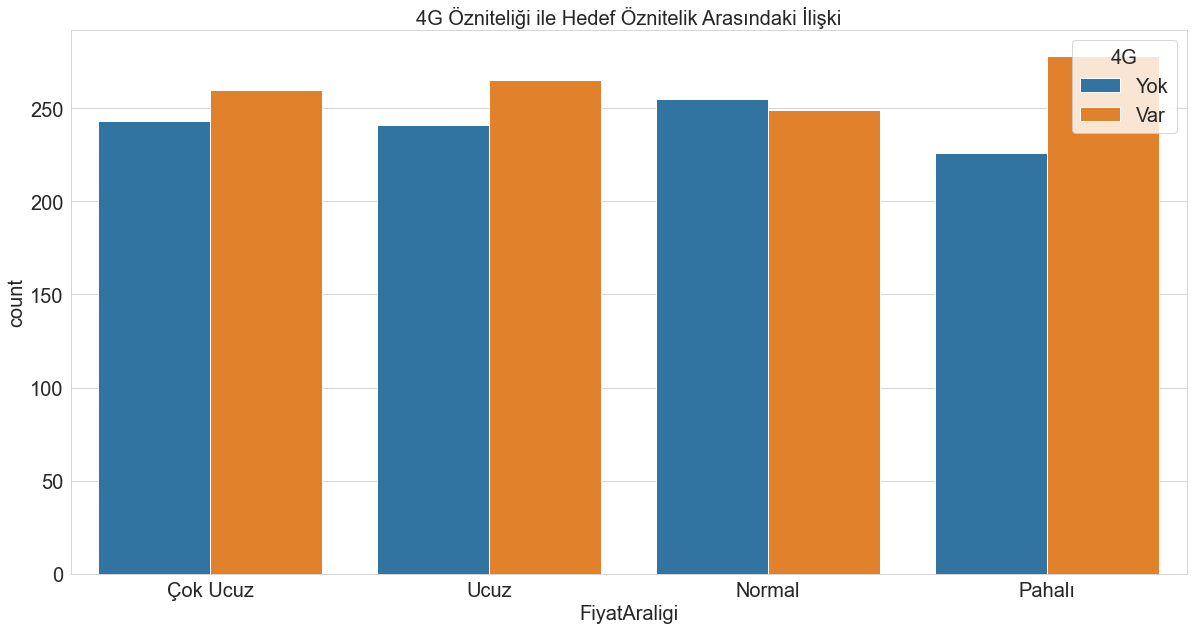

In [72]:
sns.countplot(df["FiyatAraligi"],hue=df["4G"], order=fiyat_araligi_siralama)
plt.title("4G Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

> Pahalı kategorisindeki 4G'li özellikli cihazlar çoğunluktadır. Sadece bu kategoride makas açılmıştır. Düşükte olsa arada ilişki bulunmaktadır.

**3G ile Hedef Öznitelik Arasındaki İlişki**

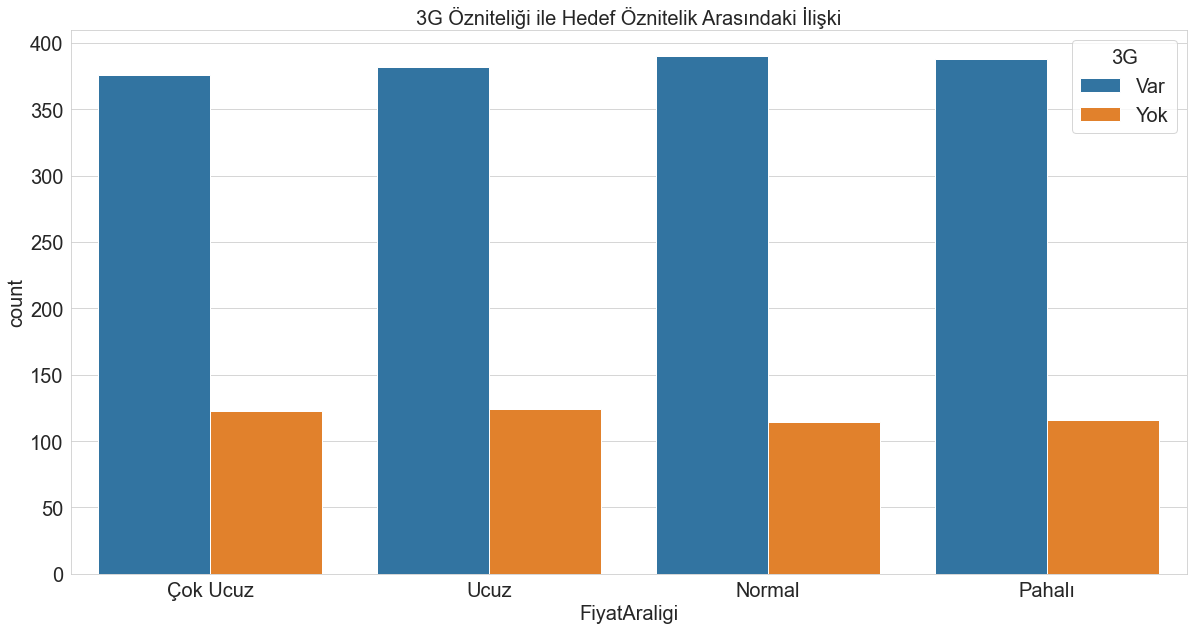

In [73]:
sns.countplot(df["FiyatAraligi"],hue=df["3G"], order=fiyat_araligi_siralama)
plt.title("3G Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

- Fiyata göre 3G özelliği bulunma durumu arasında bir ilişki bulunmamaktadır.

**Dokunmatik Özniteliği ile Hedef Öznitelik Arasındaki İlişki**

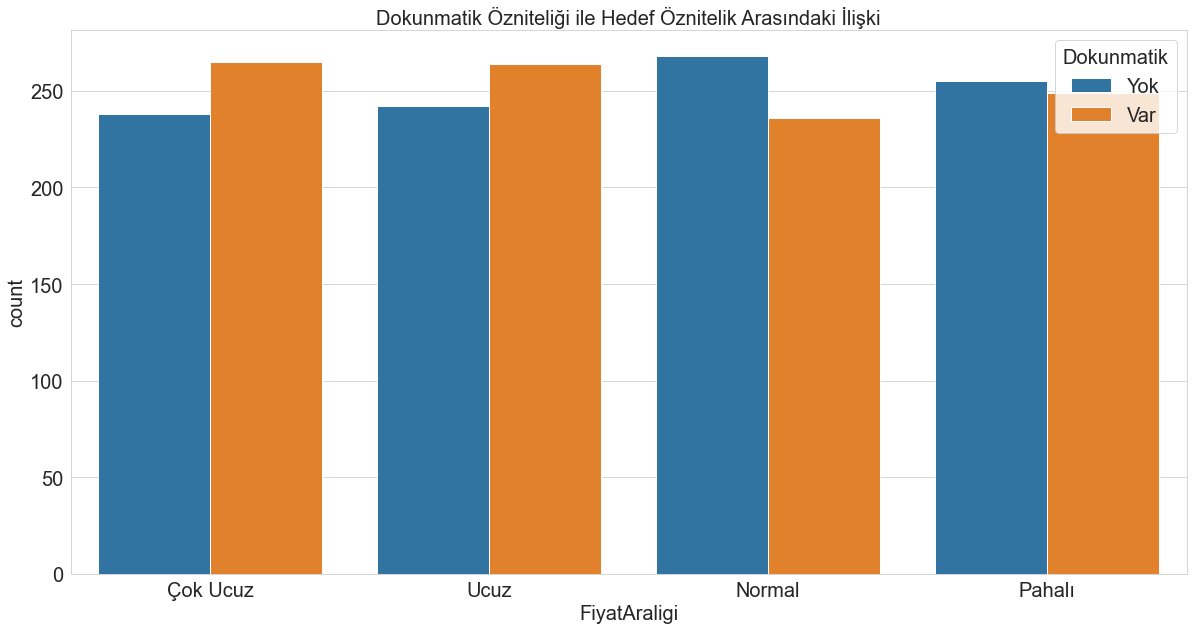

In [74]:
sns.countplot(df["FiyatAraligi"],hue=df["Dokunmatik"], order=fiyat_araligi_siralama)
plt.title("Dokunmatik Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

> - Fiyata göre dokunmatik özelliğinin bulunma durumu arasında bir ilişki bulunmamaktadır.

**Wifi ile Hedef Öznitelik Arasındaki İlişki**

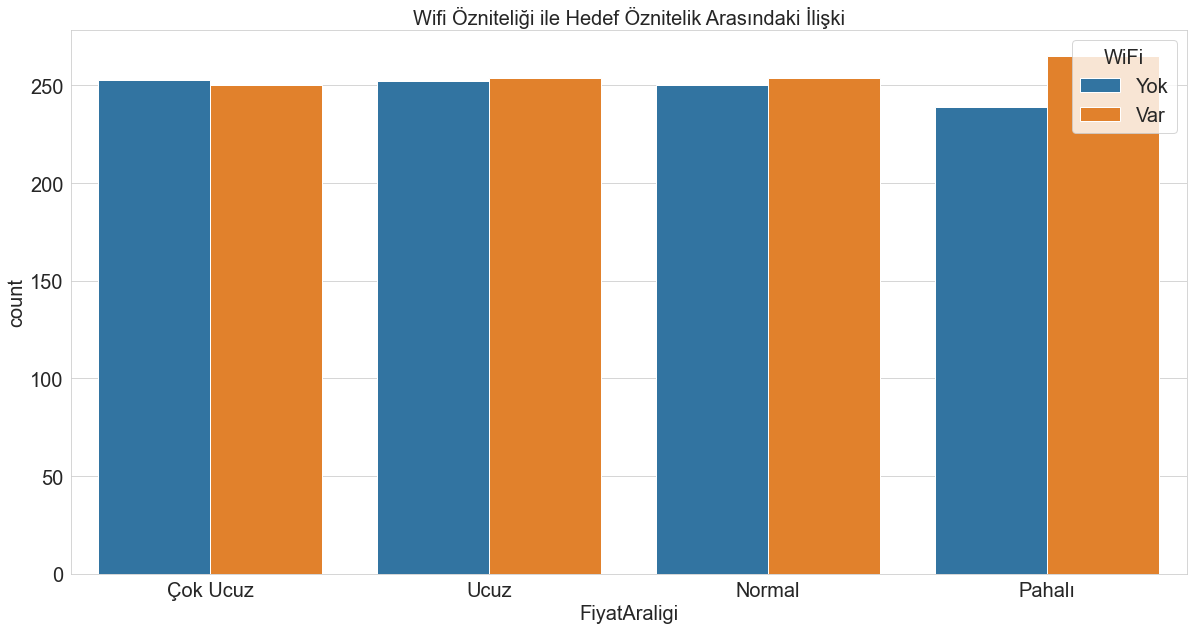

In [75]:
sns.countplot(df["FiyatAraligi"],hue=df["WiFi"], order=fiyat_araligi_siralama)
plt.title("Wifi Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.show()

> - Pahalı kategorisindeki wifi özellikli cihazlar çoğunluktadır. Sadece bu kategoride makas açılmıştır. Düşükte olsa arada ilişki bulunmaktadır.

**Renk ile Hedef Öznitelik Arasındaki İlişki**

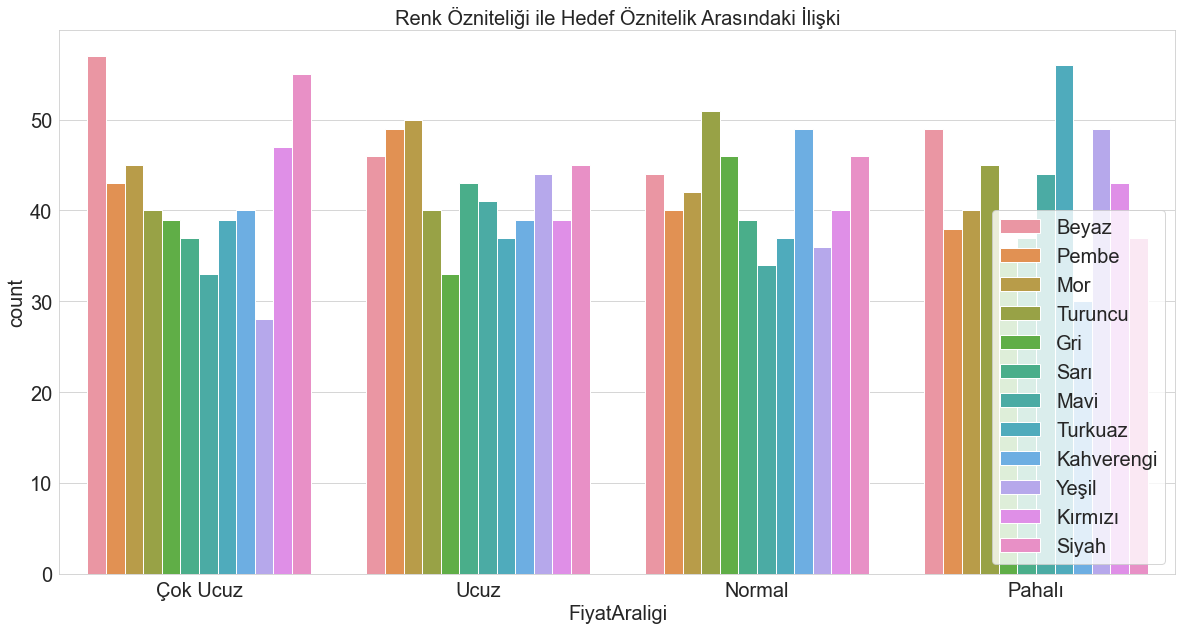

In [76]:
sns.countplot(df["FiyatAraligi"],hue=df["Renk"], order=fiyat_araligi_siralama)
plt.title("Renk Özniteliği ile Hedef Öznitelik Arasındaki İlişki")
plt.legend(loc='lower right')
plt.show()

> - Renk özniteliği ile hedef öznitelik arasında bir ilişki bulunmamaktadır.

**Hedef öznitelik ile diğer öznitelikler arasındaki ilişki analizi burada sona ermiştir**<br>

> **Numerik öznitelikler ile hedef öznitelik arasındaki ilişki analizi sonuçları:**
>> - Ram, batarya gücü, arka kamera, dahili bellek, çözünürlük yüksekliği ve çözünürlük genişliği ile fiyat aralığı arasında pozitif ilişki bulunmaktadır. Bu özniteliklerde artış meydana geldiğinde fiyat aralığı çok ucuz kategorisinden pahalı kategorisine doğru yükselmektedir.<br/>
>> - Ön kamera ve ağırlık öznitelikleri ile hedef öznitelik arasında da orta şiddette pozitif bir ilişki bulunmaktadır.  

> **Kategorik öznitelikler ile hedef öznitelik arasındaki ilişki analizi sonuçları:**
>> - Pahalı kategorisindeki tabletlerde bluetooth, çift hat, 4g, dokunmatik ve wifi özelliği bulunan tabletler, bulunmayan tabletlere göre çoğunluktadırlar.
>> - Aradaki makas sadece pahalı kategorisinde açılmıştır. Diğer kategorilerde belirli bir fark bulunmamaktadır.

<a id=2> </a>
## Ön İşleme 

### Eksik Veriler

**Bluetooth Özniteliğindeki " " Gözlemlerin np.nan ile Değiştirilmesi**

In [77]:
df['Bluetooth'] = df['Bluetooth'].replace(' ', np.nan)

In [78]:
df['Bluetooth'].unique()

array(['Yok', 'Var', nan], dtype=object)

**Eksik Verileri Doldurma İşlemi**

In [79]:
df.isnull().sum()

BataryaGucu             0
Bluetooth              10
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      4
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

> - Bluetooth özniteliğinde 10 eksik gözlem vardır.<br/>
> - RAM özniteliğinde 12 eksik gözlem vardır.<br/>
> - OnKameraMP özniteliğinde 5 eksik gözlem vardır.<br/>
> - 3G özniteliğinde 4 eksik gözlem vardır.<br/>

In [80]:
df.isnull().sum().sum()

31

In [81]:
31/2017

0.015369360436291522

> - Toplam 31 gözlemde eksik değer bulunmaktadır. Bu da veri setinin sadece %1.5'inde eksik değer olduğu anlamına gelmektedir.

**Eksik Değerler Arasındaki İlişkiyi Missingno ile Analiz Etme**

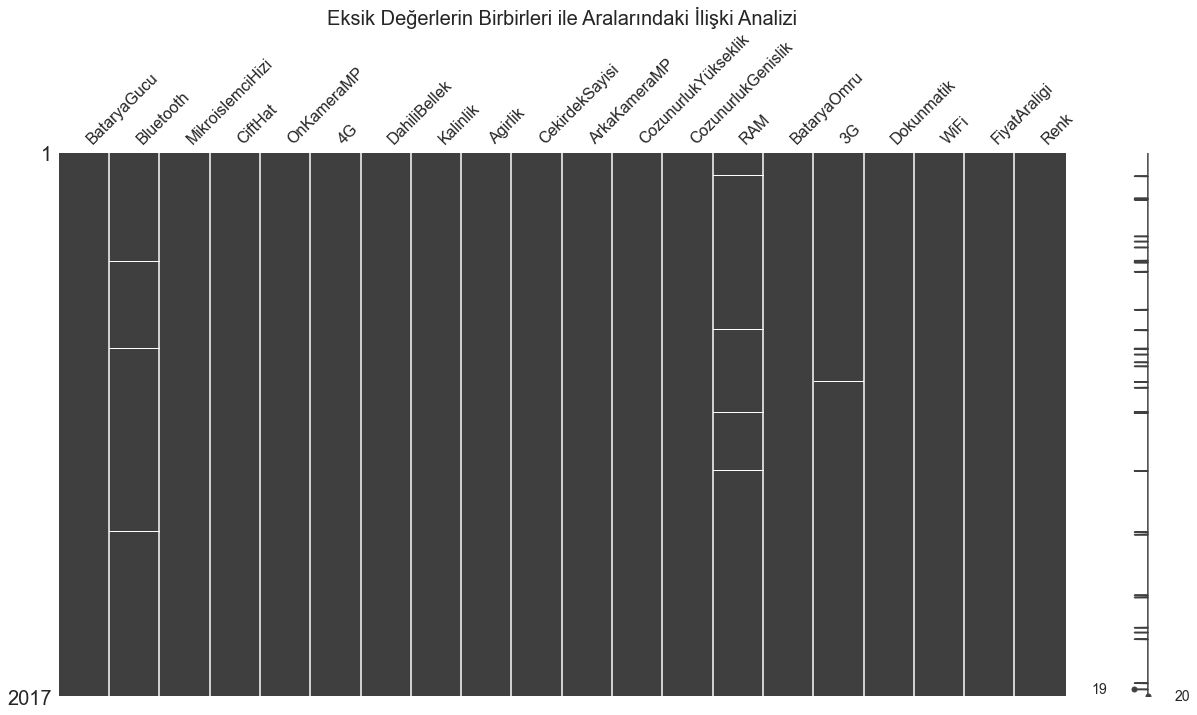

In [82]:
missingno.matrix(df,figsize=(20, 10))
plt.title("Eksik Değerlerin Birbirleri ile Aralarındaki İlişki Analizi")
plt.show()

> - Eksik değerler arasında yığılma yoktur, birbirbileri ile aralarında ilişki bulunmamaktadır rastsal olarak dağılmışlardır.

**Eksik Değerler ve Oranları.**

In [83]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son

In [84]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.000000
Bluetooth,10,0.495786
MikroislemciHizi,0,0.000000
CiftHat,0,0.000000
OnKameraMP,5,0.247893
4G,0,0.000000
DahiliBellek,0,0.000000
Kalinlik,0,0.000000
Agirlik,0,0.000000
CekirdekSayisi,0,0.000000


> - Eksik değerlerin oranları çok düşüktür bu değerleri ait olduğu fiyata aralığı kategorisindeki ortalamaları ile doldurulduğunda fiyat aralığında ve diğer özniteliklerin dağılım ölçülerinde fark yaratmayacaklar.

**Eksik Veriler Hakkında Bilgiler Elde Edildi ,Sırada Eksik Verileri Hedef Değişkene Göre Doldurma İşlemi Yapılacaktır**

**OnKameraMP Özniteliğindeki Eksik Gözlemlerin Doldurulması**

In [85]:
df[ (df["OnKameraMP"].isnull())]["FiyatAraligi"]

351     Çok Ucuz
726     Çok Ucuz
792     Çok Ucuz
1416    Çok Ucuz
1641    Çok Ucuz
Name: FiyatAraligi, dtype: object

> - OnKameraMp özniteliğindeki eksik gözlemler çok ucuz fiyat aralığı kategorisindedir.

In [86]:
df.groupby("FiyatAraligi")[["OnKameraMP"]].mean()

,OnKameraMP
FiyatAraligi,
Normal,4.468254
Pahalı,4.349206
Ucuz,4.347826
Çok Ucuz,4.122490


> - OnKameraMp özniteliğindeki eksik gözlemler çok ucuz fiyat aralığı kategorisinde olduğu için burada sadece fiyat aralığı çok ucuz olan OnKameraMp ortalama değeri ile eksik veriler doldurulacaktır.

In [87]:
eksik_onkameramp_indexleri = df[df["OnKameraMP"].isnull()].index
eksik_onkameramp_indexleri

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [88]:
df.loc[eksik_onkameramp_indexleri ,"OnKameraMP"] = 4

In [89]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.000000
Bluetooth,10,0.495786
MikroislemciHizi,0,0.000000
CiftHat,0,0.000000
OnKameraMP,0,0.000000
4G,0,0.000000
DahiliBellek,0,0.000000
Kalinlik,0,0.000000
Agirlik,0,0.000000
CekirdekSayisi,0,0.000000


**Ram Özniteliğindeki Eksik Gözlemlerin Doldurulması**

In [90]:
df[ (df["RAM"].isnull())]["FiyatAraligi"]

87      Pahalı
169     Pahalı
310     Pahalı
329     Pahalı
658     Pahalı
777     Pahalı
871     Pahalı
961     Pahalı
965     Pahalı
1180    Pahalı
1779    Pahalı
1804    Pahalı
Name: FiyatAraligi, dtype: object

> - Ram özniteliğindeki eksik gözlemler pahalı fiyat aralığı kategorisindedir.

In [91]:
df.groupby("FiyatAraligi")[["RAM"]].mean()

,RAM
FiyatAraligi,
Normal,2583.496032
Pahalı,3444.506098
Ucuz,1680.116601
Çok Ucuz,787.461233


In [92]:
eksik_RAM_indexleri=df[df["RAM"].isnull()].index
eksik_RAM_indexleri

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

> -  Ram özniteliğindeki eksik gözlemler pahalı fiyat aralığı kategorisinde olduğu için burada sadece fiyat aralığı pahalı olan ram ortalama değeri ile eksik veriler doldurulacaktır.

In [93]:
df.loc[eksik_RAM_indexleri ,"RAM"] = 3445

In [94]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.000000
Bluetooth,10,0.495786
MikroislemciHizi,0,0.000000
CiftHat,0,0.000000
OnKameraMP,0,0.000000
4G,0,0.000000
DahiliBellek,0,0.000000
Kalinlik,0,0.000000
Agirlik,0,0.000000
CekirdekSayisi,0,0.000000


**Bluetooth Özniteliğindeki Eksik Gözlemlerin Doldurulması**

In [95]:
df[ (df["Bluetooth"].isnull())]["FiyatAraligi"]

400     Çok Ucuz
405     Çok Ucuz
407     Çok Ucuz
441     Çok Ucuz
728     Çok Ucuz
748     Çok Ucuz
1407    Çok Ucuz
1649    Çok Ucuz
1761    Çok Ucuz
1967    Çok Ucuz
Name: FiyatAraligi, dtype: object

> - Bluetooth özniteliğindeki eksik gözlemler çok ucuz fiyat aralığı kategorisindedir.

In [96]:
df[df["FiyatAraligi"] == "Çok Ucuz"]["Bluetooth"].agg(pd.Series.mode)[0]

'Yok'

> - Bluetooth özniteliğindeki eksik gözlemler çok ucuz fiyat aralığı kategorisinde olduğu için burada sadece fiyat aralığı çok ucuz olan bluetooth mod değeri ile eksik veriler doldurulacaktır.

In [97]:
eksik_bluetooth_indexleri=df[df["Bluetooth"].isnull()].index
eksik_bluetooth_indexleri

Int64Index([400, 405, 407, 441, 728, 748, 1407, 1649, 1761, 1967], dtype='int64')

In [98]:
df.loc[eksik_bluetooth_indexleri ,"Bluetooth"] = "Yok"

In [99]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.000000
Bluetooth,0,0.000000
MikroislemciHizi,0,0.000000
CiftHat,0,0.000000
OnKameraMP,0,0.000000
4G,0,0.000000
DahiliBellek,0,0.000000
Kalinlik,0,0.000000
Agirlik,0,0.000000
CekirdekSayisi,0,0.000000


**3G Özniteliğindeki Eksik Gözlemlerin Doldurulması**

In [100]:
df[ (df["3G"].isnull())]["FiyatAraligi"]

174     Çok Ucuz
582     Çok Ucuz
850     Çok Ucuz
1990    Çok Ucuz
Name: FiyatAraligi, dtype: object

> - 3G özniteliğindeki eksik gözlemler çok ucuz fiyat aralığı kategorisindedir.

In [101]:
df[df["FiyatAraligi"] == "Çok Ucuz"]["3G"].agg(pd.Series.mode)[0]

'Var'

> - 3G özniteliğindeki eksik gözlemlerin bütün değerleri çok ucuz fiyat aralığına sahip olduğu için burada sadece fiyat aralığı çok ucuz olan 3G mod değeri ile eksik veriler doldurulacaktır.

In [102]:
eksik_3g_indexleri=df[df["3G"].isnull()].index
eksik_3g_indexleri

Int64Index([174, 582, 850, 1990], dtype='int64')

In [103]:
df.loc[eksik_3g_indexleri ,"3G"] = "Var"

In [104]:
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
BataryaGucu,0,0.0
Bluetooth,0,0.0
MikroislemciHizi,0,0.0
CiftHat,0,0.0
OnKameraMP,0,0.0
4G,0,0.0
DahiliBellek,0,0.0
Kalinlik,0,0.0
Agirlik,0,0.0
CekirdekSayisi,0,0.0


> - Yukarıdaki grafikte de görüldüğü üzere eksik veri kalmamıştır.

### Aykırı Değer Analizi

**Bu Analiz için Boxplot Grafikleri Kullanılacaktır.**

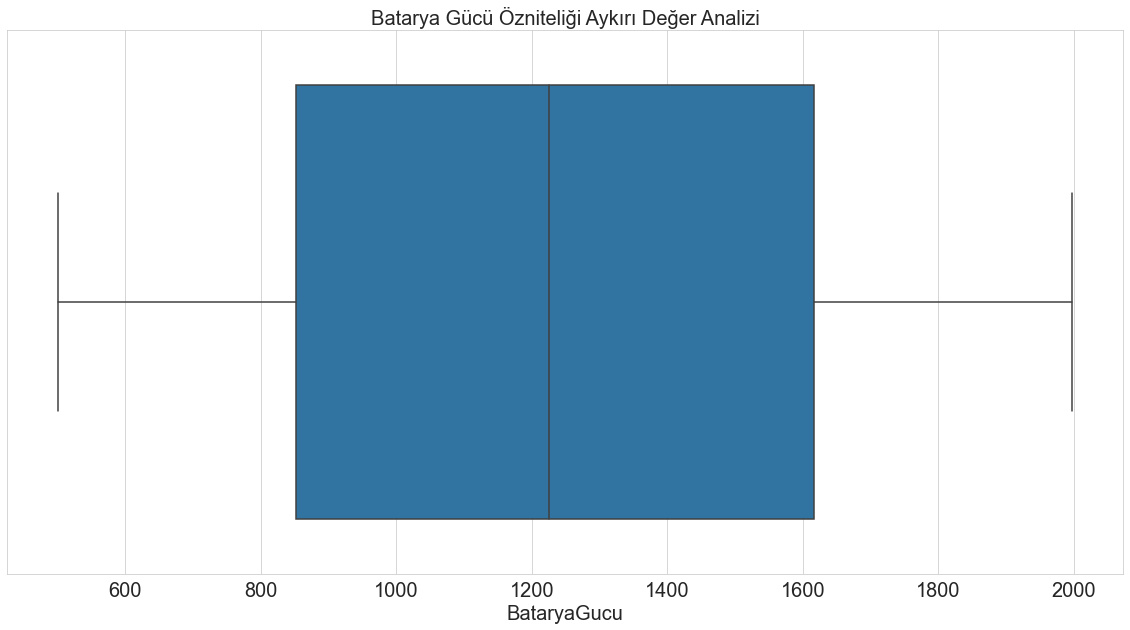

In [105]:
sns.boxplot(x = df['BataryaGucu'])
plt.title("Batarya Gücü Özniteliği Aykırı Değer Analizi")
plt.show()

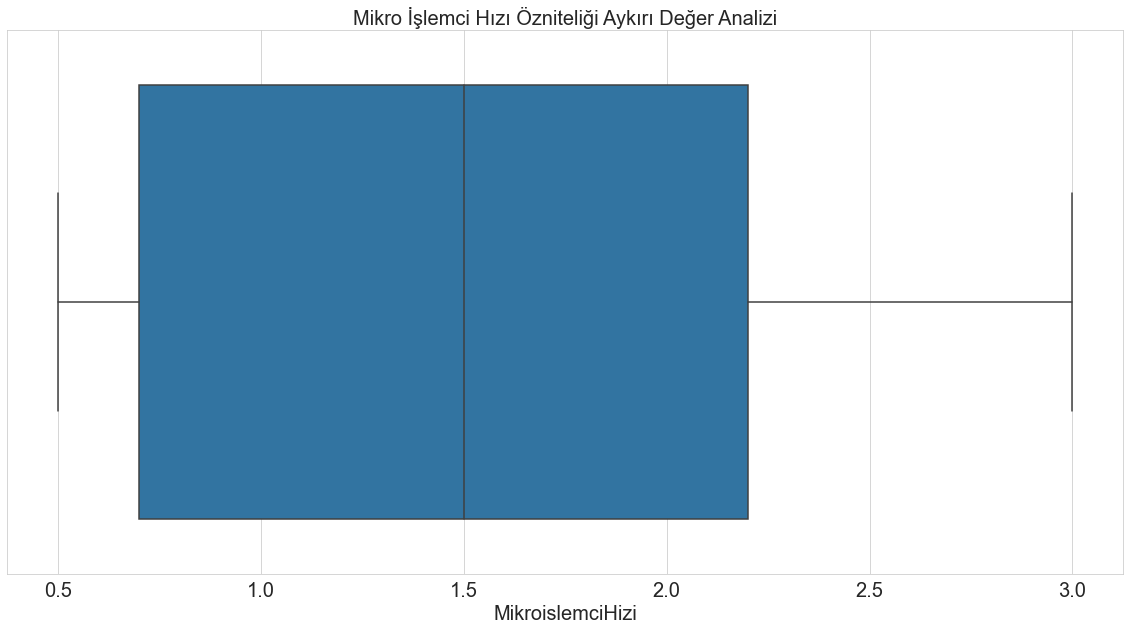

In [106]:
sns.boxplot(x = df['MikroislemciHizi'])
plt.title("Mikro İşlemci Hızı Özniteliği Aykırı Değer Analizi")
plt.show()

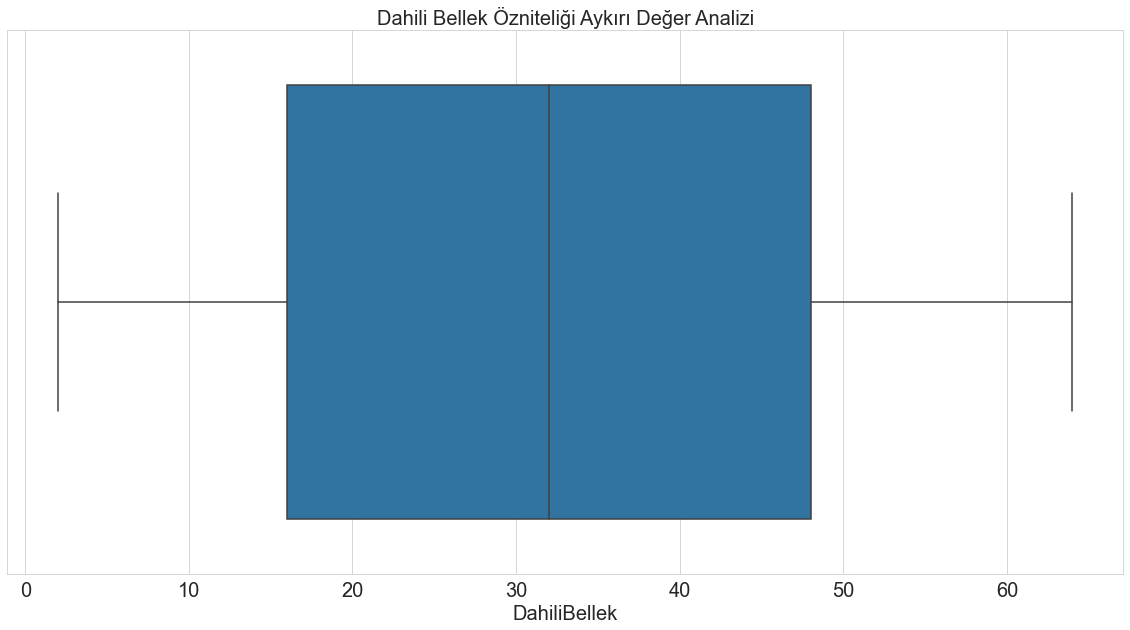

In [107]:
sns.boxplot(x = df['DahiliBellek'])
plt.title("Dahili Bellek Özniteliği Aykırı Değer Analizi")
plt.show()

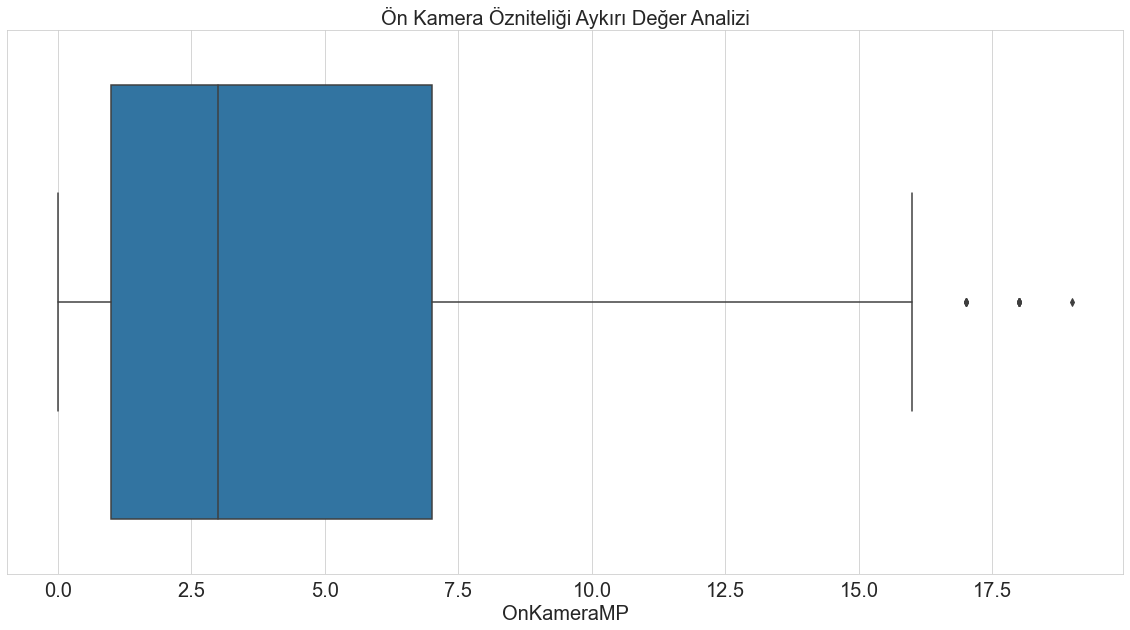

In [108]:
sns.boxplot(x = df['OnKameraMP'])
plt.title("Ön Kamera Özniteliği Aykırı Değer Analizi")
plt.show()

> Ön kamera özniteliğinde aykırı değerler bulunmaktadır.

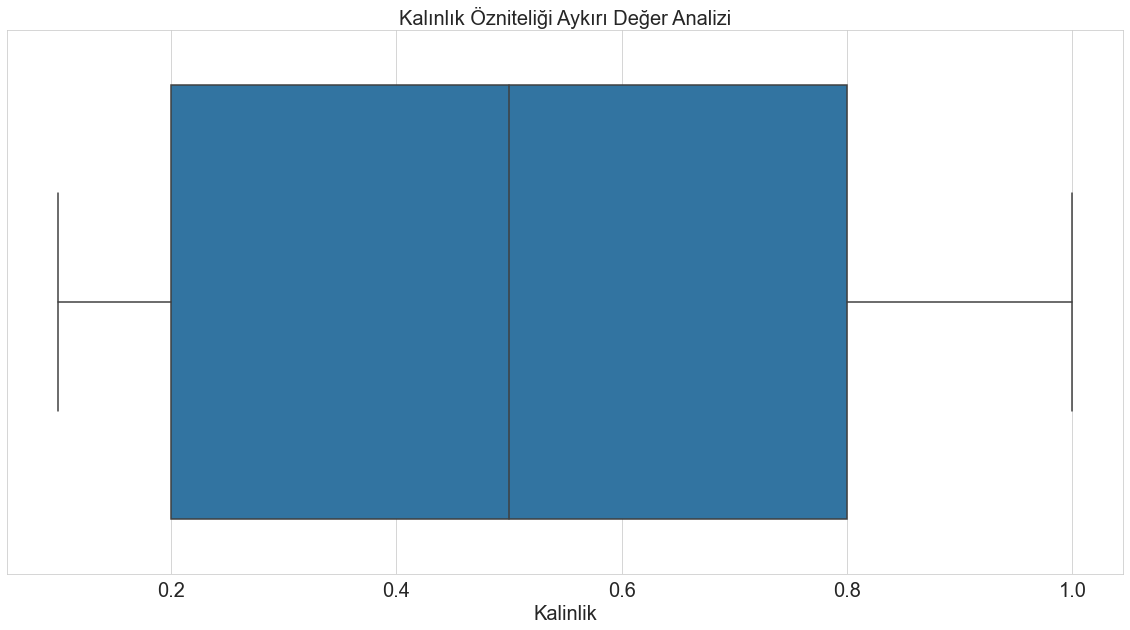

In [109]:
sns.boxplot(x = df['Kalinlik'])
plt.title("Kalınlık Özniteliği Aykırı Değer Analizi")
plt.show()

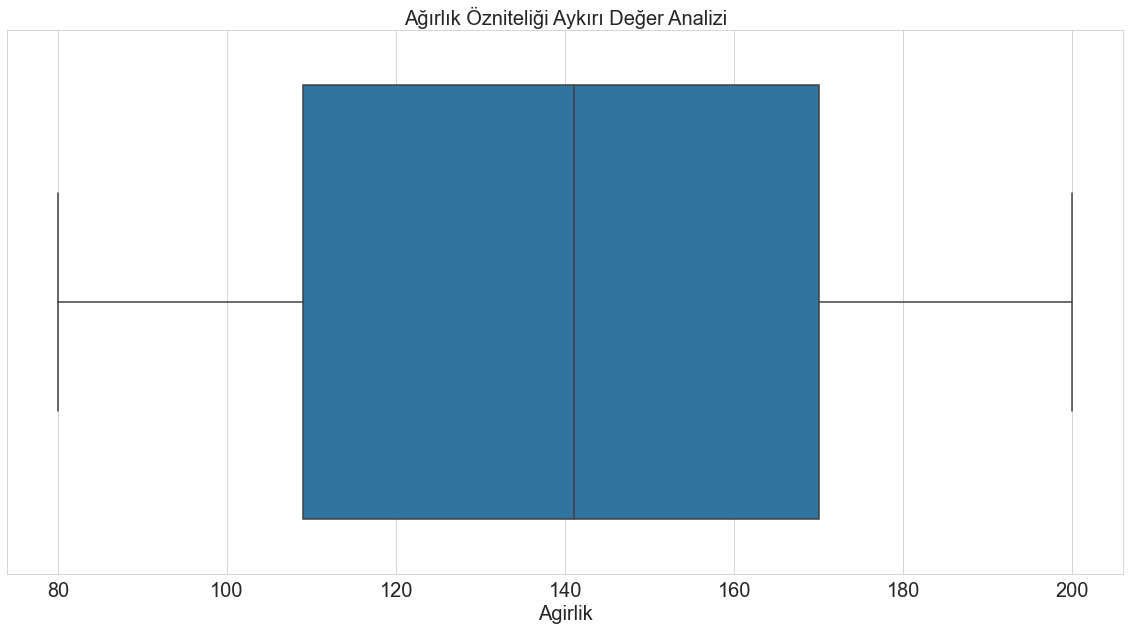

In [110]:
sns.boxplot(x = df['Agirlik'])
plt.title("Ağırlık Özniteliği Aykırı Değer Analizi")
plt.show()

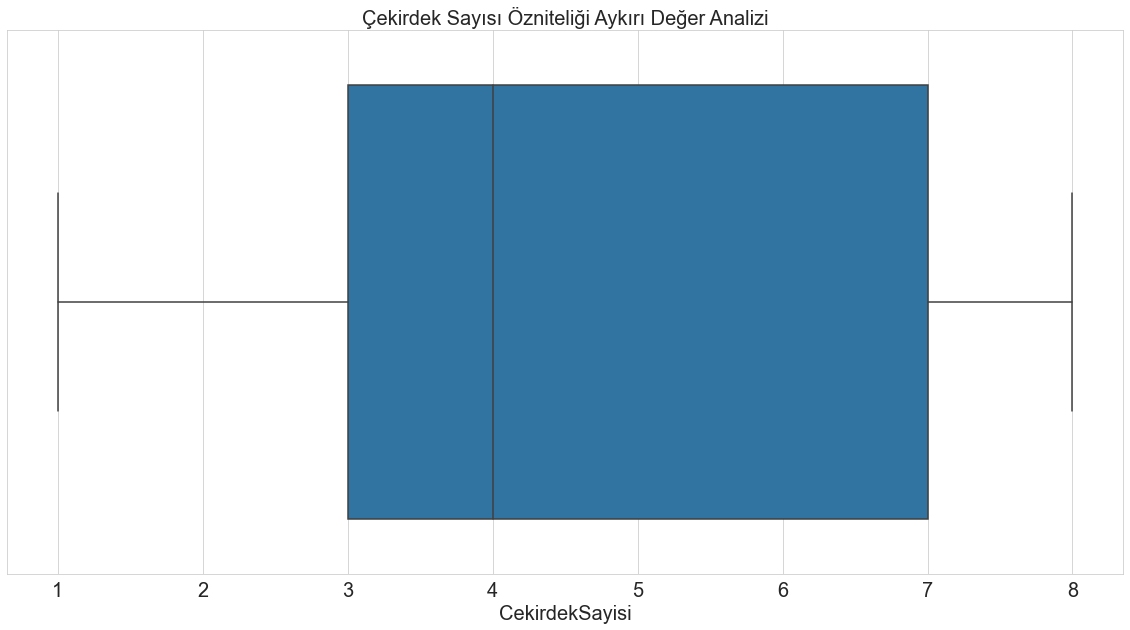

In [111]:
sns.boxplot(x = df['CekirdekSayisi'])
plt.title("Çekirdek Sayısı Özniteliği Aykırı Değer Analizi")
plt.show()

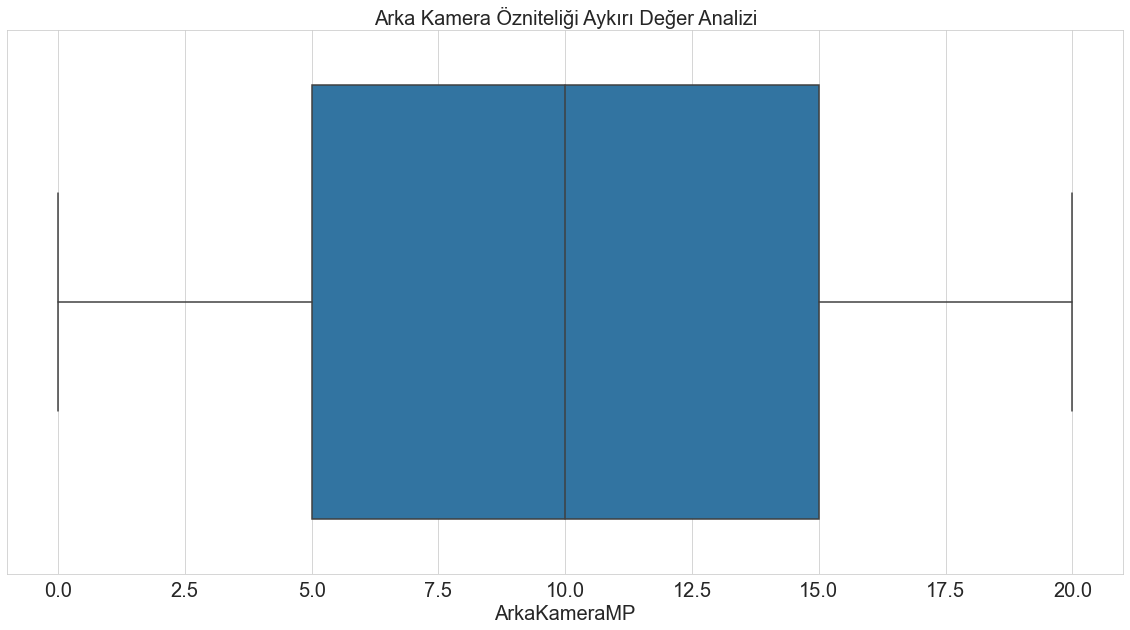

In [112]:
sns.boxplot(x = df['ArkaKameraMP'])
plt.title("Arka Kamera Özniteliği Aykırı Değer Analizi")
plt.show()

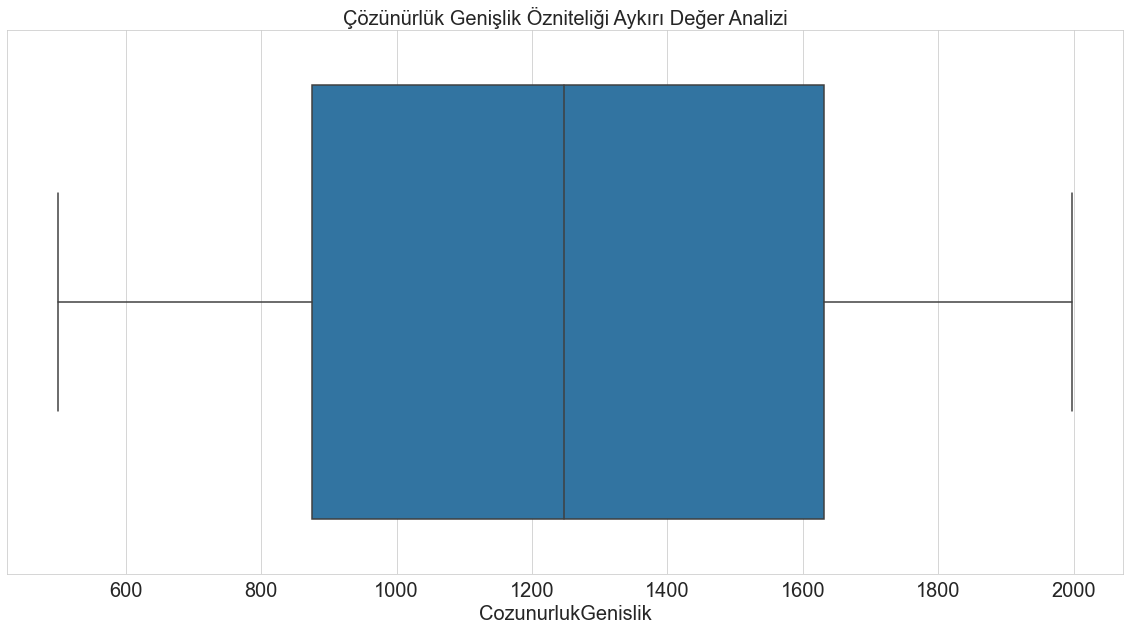

In [113]:
sns.boxplot(x = df['CozunurlukGenislik'])
plt.title("Çözünürlük Genişlik Özniteliği Aykırı Değer Analizi")
plt.show()

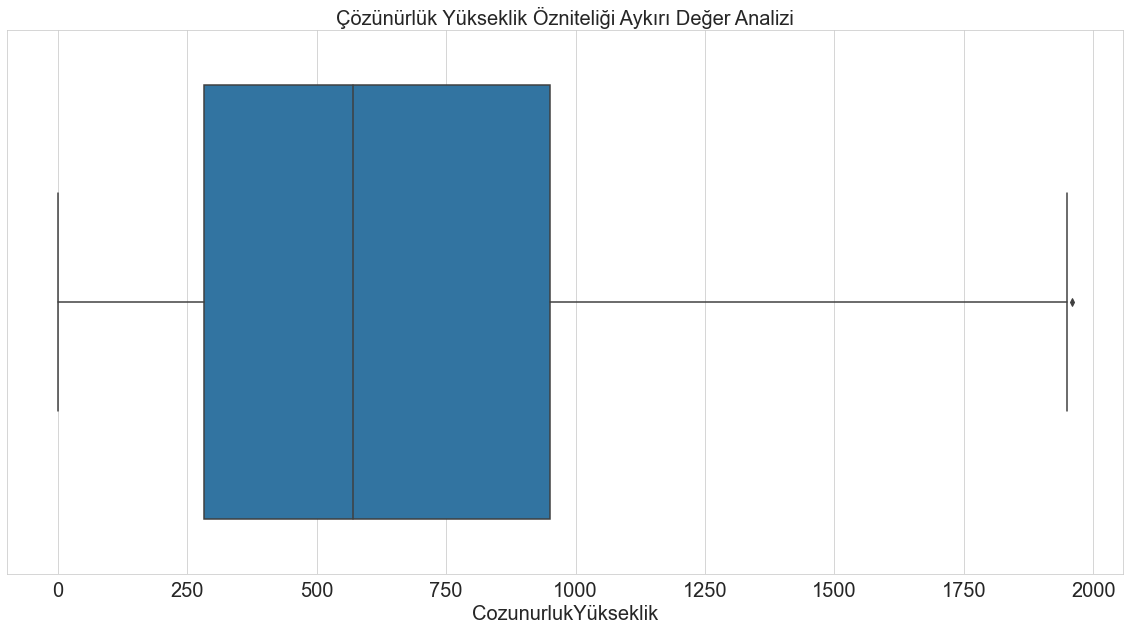

In [114]:
sns.boxplot(x = df['CozunurlukYükseklik'])
plt.title("Çözünürlük Yükseklik Özniteliği Aykırı Değer Analizi")
plt.show()

> Çözünürlük yükseklik özniteliğinde aykırı değerler bulunmaktadır.

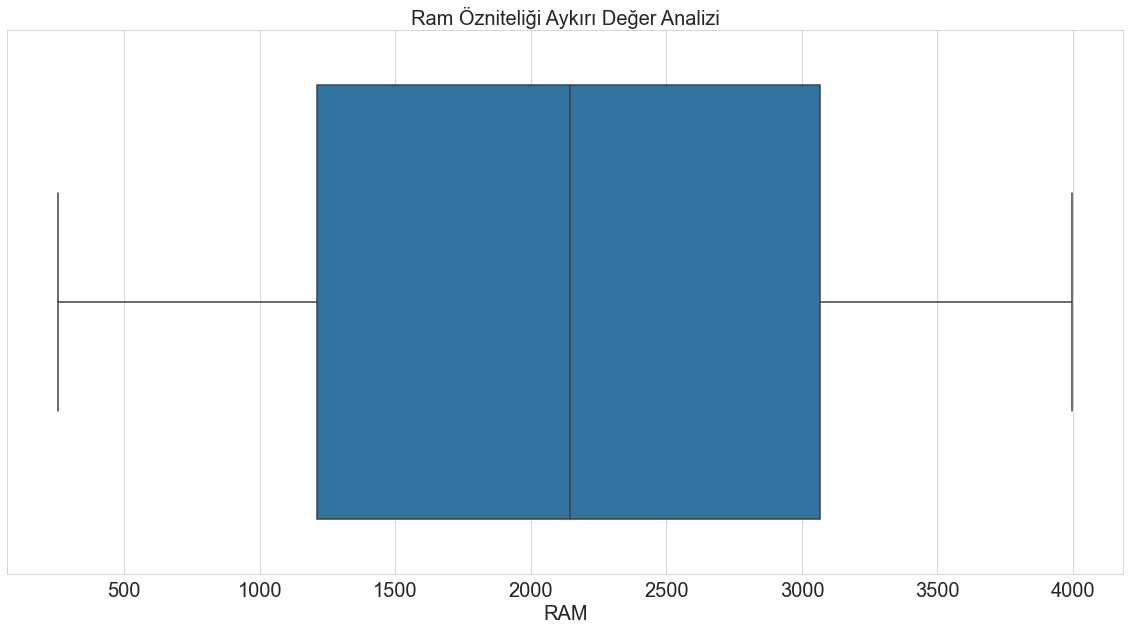

In [115]:
sns.boxplot(x = df['RAM'])
plt.title("Ram Özniteliği Aykırı Değer Analizi")
plt.show()

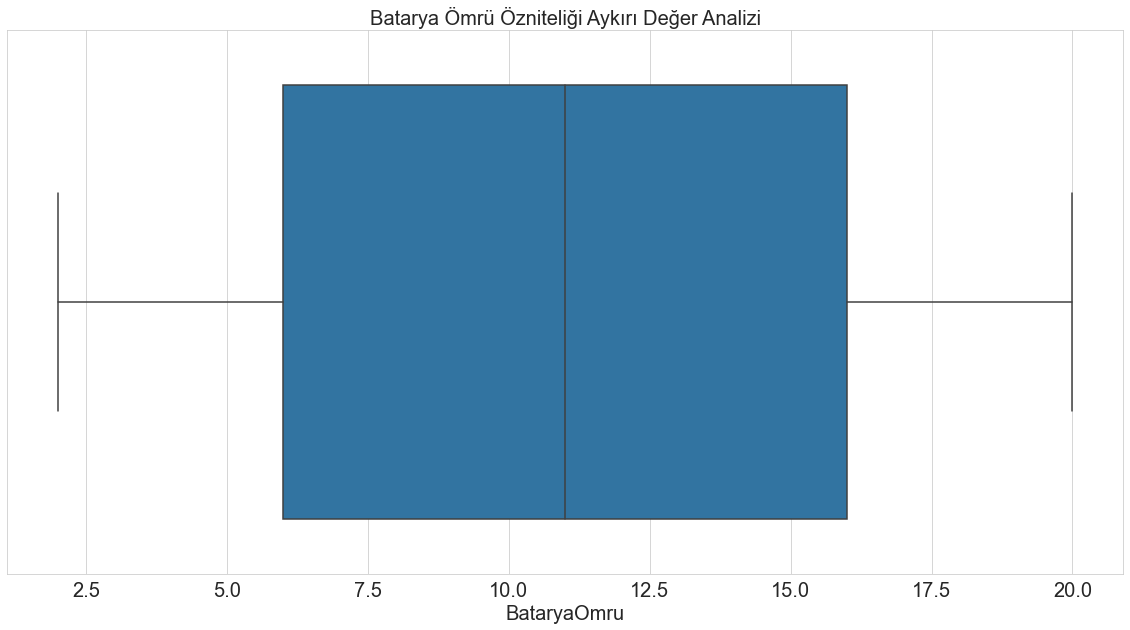

In [116]:
sns.boxplot(x = df['BataryaOmru'])
plt.title("Batarya Ömrü Özniteliği Aykırı Değer Analizi")
plt.show()

**OnKameraMp Özniteliği Aykırı Değer Analizi**

In [117]:
Q1 = df.OnKameraMP.quantile(0.25) 
Q2 = df.OnKameraMP.quantile(0.5) 
Q3 = df.OnKameraMP.quantile(0.75)
Q4 = df.OnKameraMP.quantile(1)

IQR = Q3 - Q1

In [118]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [119]:
print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)
print("Alt sınır: Q1 - 1.5 * IQR ->", alt_sinir)
print("Üst sınır: Q3 + 1.5 * IQR ->", ust_sinir)

Q1 -> 1.0
Q3 -> 7.0
Q2 -> 3.0
Q4 -> 19.0
IQR -> 6.0
Alt sınır: Q1 - 1.5 * IQR -> -8.0
Üst sınır: Q3 + 1.5 * IQR -> 16.0


In [120]:
outliers_df = df[(df["OnKameraMP"] < alt_sinir) | (df["OnKameraMP"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
246,1708,Var,2.4,Var,18.0,Var,49,0.1,109,1,19,233,517,3388.0,16,Var,Var,Var,Pahalı,Turkuaz
397,1290,Var,1.4,Var,19.0,Var,35,0.3,110,4,20,405,742,879.0,8,Var,Yok,Yok,Çok Ucuz,Siyah
401,1957,Yok,1.2,Var,18.0,Var,36,0.8,151,2,19,1194,1727,1115.0,18,Var,Yok,Var,Ucuz,Turuncu
513,1703,Var,1.5,Var,17.0,Var,55,0.7,138,5,19,1411,1711,2993.0,20,Var,Var,Var,Pahalı,Yeşil
642,591,Yok,2.1,Var,18.0,Var,16,0.5,196,7,20,952,1726,704.0,4,Var,Var,Var,Çok Ucuz,Kırmızı
661,946,Var,2.6,Var,17.0,Yok,5,0.1,166,3,20,1698,1771,3720.0,4,Yok,Var,Yok,Pahalı,Kırmızı
867,1772,Var,1.6,Yok,17.0,Var,45,0.5,159,2,18,837,1405,1146.0,17,Var,Var,Yok,Ucuz,Turkuaz
896,1448,Yok,0.5,Var,18.0,Yok,2,0.2,100,5,19,846,1144,593.0,18,Var,Var,Var,Çok Ucuz,Turkuaz
920,1348,Yok,2.0,Yok,18.0,Yok,52,0.3,98,3,20,1869,1942,955.0,7,Var,Var,Var,Ucuz,Mavi
975,1937,Var,1.7,Yok,17.0,Yok,58,0.6,189,1,19,1728,1767,3321.0,14,Var,Var,Yok,Pahalı,Kahverengi


In [121]:
outliers_df.shape[0]/df.shape[0]

0.009419930589985127

- Aykırı değerler veri setinin binde 9'unu kapsadığı için bu gözlemler veri setinden çıkarılacaktır.

In [122]:
df.drop(outliers_df.index,inplace=True)

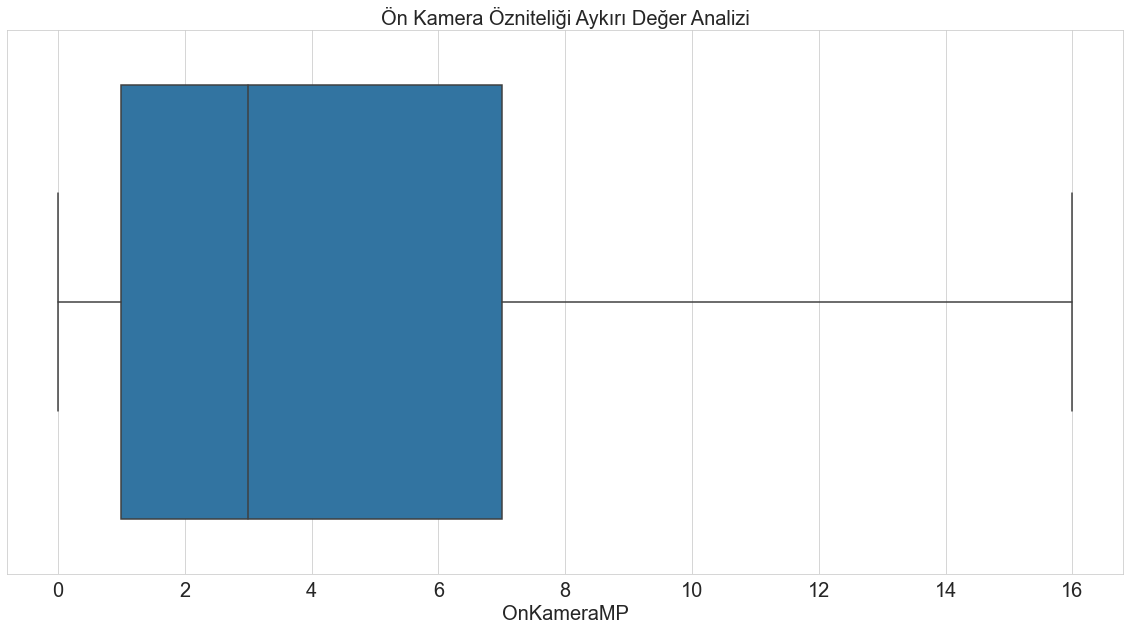

In [123]:
sns.boxplot(x = df['OnKameraMP'])
plt.title("Ön Kamera Özniteliği Aykırı Değer Analizi")
plt.show()

**Çözünürlük Yükseklik Özniteliği Aykırı Değer Analizi**

In [124]:
Q1 = df.CozunurlukYükseklik.quantile(0.25) 
Q2 = df.CozunurlukYükseklik.quantile(0.5) 
Q3 = df.CozunurlukYükseklik.quantile(0.75)
Q4 = df.CozunurlukYükseklik.quantile(1)

IQR = Q3 - Q1

In [125]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [126]:
print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)
print("Alt sınır: Q1 - 1.5 * IQR ->", alt_sinir)
print("Üst sınır: Q3 + 1.5 * IQR ->", ust_sinir)

Q1 -> 282.0
Q3 -> 945.75
Q2 -> 564.0
Q4 -> 1960.0
IQR -> 663.75
Alt sınır: Q1 - 1.5 * IQR -> -713.625
Üst sınır: Q3 + 1.5 * IQR -> 1941.375


In [127]:
outliers_df = df[(df["CozunurlukYükseklik"] < alt_sinir) | (df["CozunurlukYükseklik"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1115,1413,Var,0.5,Var,4.0,Var,45,0.4,104,5,6,1949,1994,2973.0,15,Var,Yok,Var,Pahalı,Kırmızı
1820,1230,Var,1.6,Yok,0.0,Var,48,0.7,111,7,2,1960,1963,1622.0,16,Var,Var,Var,Normal,Yeşil


In [128]:
outliers_df.shape[0]/df.shape[0]

0.001001001001001001

- Aykırı değerler veri setinin binde 1'ini kapsadığı için bu gözlemler veri setinden çıkarılacaktır.

In [129]:
df.drop(outliers_df.index,inplace=True)

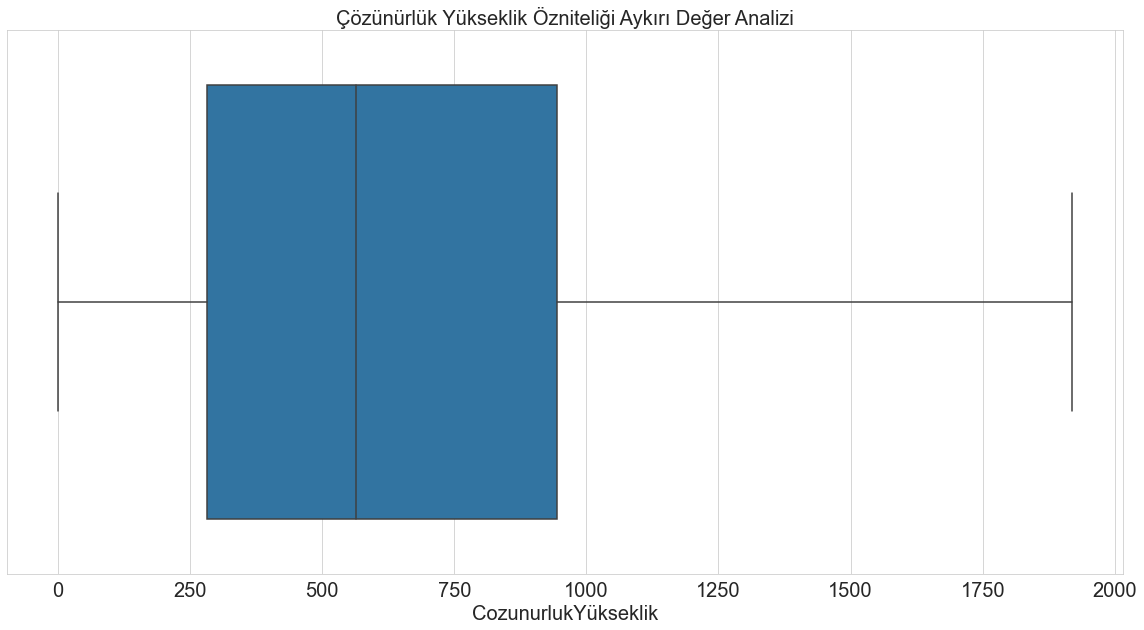

In [130]:
sns.boxplot(x = df['CozunurlukYükseklik'])
plt.title("Çözünürlük Yükseklik Özniteliği Aykırı Değer Analizi")
plt.show()

### Kategorik Özniteliklerin Dönüşümleri

**Label Encoding İşlemi Gerçekleştirimi**

In [131]:
label_encoder = preprocessing.LabelEncoder()

In [132]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [133]:
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [134]:
df['4G'] = label_encoder.fit_transform(df['4G'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [135]:
df['3G'] = label_encoder.fit_transform(df['3G'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,Var,Normal,Beyaz


In [136]:
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,Var,Normal,Beyaz


In [137]:
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


In [138]:
df['FiyatAraligi'] = label_encoder.fit_transform(df['FiyatAraligi'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,0,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,1,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,2,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,1,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,0,Beyaz


<a id=3> </a>
## Öznitelik İşlemleri

> Yukarıdaki analizler sonucu renk ile fiyat aralığı arasında ilişki bulunamamıştır. Ayrıca renk özniteliği ile one hot encoding yapıldığında 9 yeni öznitelik veri setine eklenecektir. Bu nedenlerden dolayı renk özniteliğinin veri setinden çıkarılmasına karar verilmiştir.

In [139]:
df.drop(columns="Renk",inplace=True)

In [140]:
df.shape

(1996, 19)

> - Model oluşturma aşamasına 1996 gözlem ve 19 öznitelik ile devam edilmektedir.

<a id=4> </a>
## Tahmine Dayalı Analitik Makine Öğrenmesi

**Fiyat Aralığı Özniteliğini yani Hedef Öznitelik(Bağımlı Değişken) y'e ,Diğer Öznitelikler(Bağımsız Değişkenler) ise X'e Atanacaktır**

In [141]:
X = df.drop("FiyatAraligi", axis = 1)
y = df["FiyatAraligi"]

**X ve y Değişkenleri**

In [142]:
X

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,618,0,1.0,1,9.0,0,13,0.1,80,4,15,591,724,1424.0,7,0,0,1
2012,936,0,2.3,1,5.0,0,57,0.2,129,2,6,657,938,2049.0,5,0,0,1
2013,1008,1,0.8,1,11.0,1,61,1.0,114,3,15,1077,1122,2009.0,11,0,1,1
2014,1977,1,1.3,0,2.0,1,31,0.4,173,8,6,1145,1356,2641.0,7,1,1,1


In [143]:
y

0       0
1       1
2       2
3       1
4       0
       ..
2011    3
2012    2
2013    2
2014    1
2015    2
Name: FiyatAraligi, Length: 1996, dtype: int32

**Bağımlı ve Bağımsız Değişkenler Birbirinden Ayrıldı. Bir Sonraki Adım Train ve Test için Verileri %75 e %25 Oranında Bölümlenmesi Gerçekleştirilecek**

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


In [145]:
X_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
1470,1821,1,0.9,1,9.0,0,12,0.3,114,1,18,97,1803,2430.0,6,0,0,0
1781,1565,0,0.5,1,0.0,1,38,0.1,121,5,1,781,1364,308.0,7,0,0,0
182,1330,1,1.1,1,11.0,1,37,0.7,126,7,20,1103,1637,2166.0,4,0,1,1
1982,626,0,2.8,0,3.0,0,11,0.8,109,2,9,737,1759,1077.0,4,0,1,0
721,805,0,1.7,0,0.0,0,58,0.9,168,3,10,81,1544,3397.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,504,0,2.8,0,2.0,1,54,0.4,163,2,10,1207,1539,2378.0,2,0,1,1
1308,840,1,1.2,0,5.0,0,15,0.3,178,6,8,526,1728,2636.0,6,0,0,1
866,1872,1,0.5,0,3.0,1,17,0.7,89,6,6,1749,1767,724.0,9,0,1,0
1475,1814,1,1.4,0,1.0,0,9,0.4,141,2,2,756,786,3556.0,16,0,1,1


In [146]:
X_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
897,1254,0,2.3,1,0.0,0,44,0.2,149,1,10,204,1021,3011.0,12,0,0,1
1691,1692,1,2.3,0,4.0,0,46,0.9,139,1,6,674,1925,1394.0,6,0,0,1
417,1358,0,0.5,1,11.0,0,36,0.3,155,4,14,1565,1858,3068.0,4,0,0,1
1442,689,1,1.4,1,2.0,1,45,0.5,103,5,11,256,823,3585.0,10,0,1,1
855,1885,1,2.4,0,12.0,0,14,0.6,92,4,15,1406,1517,1277.0,16,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,531,0,0.5,0,0.0,0,12,0.5,121,4,3,158,1657,2331.0,20,0,1,0
1651,1564,1,2.3,1,4.0,0,25,0.5,189,6,17,1259,1965,1496.0,7,0,0,0
940,1059,1,2.4,1,8.0,1,61,0.1,134,3,18,1613,1916,3716.0,11,0,0,1
1953,1347,1,1.5,0,10.0,1,56,0.3,95,1,19,398,1528,2456.0,13,0,0,0


In [147]:
y_train

1470    0
1781    3
182     0
1982    3
721     0
       ..
1144    0
1308    0
866     2
1475    1
1140    0
Name: FiyatAraligi, Length: 1497, dtype: int32

In [149]:
y_test

897     0
1691    2
417     1
1442    1
855     2
       ..
1443    2
1651    2
940     1
1953    0
1476    1
Name: FiyatAraligi, Length: 499, dtype: int32

### Model Seçim

In [153]:
def train_models(alg):
    model = alg()
    cross_validation_score = cross_val_score(model, X, y, cv = 10).mean()
    model_name = alg.__name__
    print(model_name, "Cross Validation Score: ",cross_validation_score)

In [154]:
models = [LGBMClassifier,
          XGBClassifier,
          GradientBoostingClassifier,
          RandomForestClassifier,
          MLPClassifier,
          GaussianNB,
          AdaBoostClassifier,
          MLPClassifier,
          KNeighborsClassifier]

In [155]:
for model in models:
    train_models(model)

LGBMClassifier Cross Validation Score:  0.917361809045226
XGBClassifier Cross Validation Score:  0.9138341708542713
GradientBoostingClassifier Cross Validation Score:  0.9163366834170855
RandomForestClassifier Cross Validation Score:  0.8947939698492462
MLPClassifier Cross Validation Score:  0.649316582914573
GaussianNB Cross Validation Score:  0.8060879396984925
AdaBoostClassifier Cross Validation Score:  0.6708592964824119
MLPClassifier Cross Validation Score:  0.6267386934673367
KNeighborsClassifier Cross Validation Score:  0.9183517587939697


> - Yukarıda görüldüğü üzere en başarılı sonucu k-nn algoritması ile oluşturulan model vermiştir.

### K-NN Algoritması ile Model Eğitimi

In [180]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [181]:
y_pred = knn_model.predict(X_test)

In [182]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[113   7   7   0]
 [  6 132   0   0]
 [  4   0 110   4]
 [  0   0   4 112]]


> - En iyi Çok Ucuz(3. sınıf) sınıfından kaçırmamıştır. <br/> 
> - Normal sınıfından(0. sınıf) 14 tane, Pahalı sınıfından(1. sınıf) 6 tane, Ucuz sınıfından(2. sınıf) 8 tane ve Çok Ucuz sınıfından(3. sınıf) ise 4 tane kaçırmıştır.<br/>
> - Doğru ve yanlışlar analiz edildiğinde çıkan sonuç oldukça tatmin edicidir.

In [183]:
accuracy_score(y_test, y_pred)

0.935871743486974

> Başarı skoru %93.5'tir.<br/>

In [184]:
cross_val_score(knn, X, y, cv = 10).mean()

0.9183517587939697

> Cross validation skoru ise yukarıda model seçiminde de görüldüğü üzere %91.8'dir. Classification raporu incelenip değerlendirilecektir.

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       127
           1       0.95      0.96      0.95       138
           2       0.91      0.93      0.92       118
           3       0.97      0.97      0.97       116

    accuracy                           0.94       499
   macro avg       0.94      0.94      0.94       499
weighted avg       0.94      0.94      0.94       499



> - Yukarıdaki her bir sınıf bazında başarılar kontrol edildiğinde herhangi bir yanlılık veya yanıltıcı bir başarı söz konusu olmadığı anlaşılmaktadır. <br/>
> - Yukarıda görüldüğü üzere normal kategorisindeki başarı oranı diğer kategorilere göre daha az başarılıdır. Bunun nedeni aslında keşifçi veri analizi yapılırken anlaşılmıştır. Normal kategorisine ait tabletlerin özellikleri diğer kategorilere ait tabletlerin özelliklerine benzerlik göstermektedir. Özellikle nümerik özniteliklerin aralıkları normal tabletlerde çok geniştir ve keskin belirleyici bir ayrım yoktur. Bu nedenle modelin normal kategorisindeki tahmin başarısı daha azdır.<br/>
> - Komşu sayısı bakımından optimizasyon yapılarak k-nn modelinin başarı skoru yükseltilmeye çalışılacaktır.

**K-NN Modeli Küme Optimizasyonu**

In [162]:
knn_params = {"n_neighbors": np.arange(2,100)}

In [163]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10, verbose=2, n_jobs=4)

In [164]:
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=2)

In [165]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametre: " + str(knn_cv.best_params_))

En iyi skor: 0.935883668903803
En iyi parametre: {'n_neighbors': 23}


> - Yukarıdaki skor eğitim testi ile optimize edilmiş model sonucudur.<br/>
> - En iyi parametre ile tekrar model oluşturulup test verisi başarı skoru çıkarılacaktır.

### Optimize Model Oluşturma

In [186]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn_tuned = knn.fit(X_train, y_train)

In [187]:
y_pred = knn_tuned.predict(X_test)

In [188]:
accuracy_score(y_test, y_pred)

0.9278557114228457

> - Başarı skorunda %0.8 azalma gerçekleşmiştir. Cross validation skoru da incelenecektir.

In [189]:
cross_val_score(knn, X, y, cv = 10).mean()

0.9353618090452261

> - Son yapılan değişiklik ile cross validation skoru %93.53'e yükselmiştir.<br/>
>-  Her ne kadar accuracy skorunda küçük bir düşme gerçekleşse de daha güvenilir bir sonuç veren cross validation skorunda yükselme gerçekleşmiştir.

**Optimize modelin classification raporu incelenecektir**

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       127
           1       0.95      0.94      0.95       138
           2       0.90      0.92      0.91       118
           3       0.97      0.97      0.97       116

    accuracy                           0.93       499
   macro avg       0.93      0.93      0.93       499
weighted avg       0.93      0.93      0.93       499



> - Diğer modele benzer sonuçlar karşımıza gelmektedir. Yine en iyi çok ucuz kategorisinde tahminde bulunurken en kötü ise normal kategorisinde tahminler gerçekleştirmiştir.<br/>

<a id=5> </a>
## Değerlendirme

**1.** Yukarıda bir çok sınıflandırma modelleri denenmiştir ve en başarılı sonucu k-nn modeli verdiği için bu model ile eğitim gerçekleştirilmiştir.<br/>
**2.** Optimize edilmiş model ile %93.5'lik cross validation başarı skoru yakalanmıştır.<br/>
**3.** Modelin sadece accuracy değil precision, recall ve f1 skoru değerleri de dikkate alınmıştır. Sonucunda herhangi bir yanlılığın olmadığı anlaşılmıştır. Bu durumda model hiç görmediği yeni veriler ile de başarıyı yakalayacağı düşünülmektedir.<br/>
**4.** Model en iyi çok ucuz kategorisindeki tabletlerde tahmin yaparken en kötü ise normal kategorisinde tahminler yapmıştır. Normal kategorisine ait tabletlerin özellikleri diğer kategorilere ait tabletlerin özelliklerine benzerlik göstermektedir. Özellikle nümerik özniteliklerin aralıkları normal tabletlerde çok geniştir ve keskin belirleyici bir ayrım yoktur. Bu nedenle modelin normal kategorisindeki tahmin başarısı daha azdır.